In [ ]:
# FITE7410 Financial Fraud Analytics First Semester, 2025-2026 -----------------
# Assignment 1 Exploratory Data Analysis (EDA)
# Student: Choi Chi For 3036384024
# Due Date: 19 Oct, 2025 (Sun) 23:59
# Objective of this assignment:
# 1. Perform data cleaning and preparation
# 2. Explore and visualize the data to identify patterns and trends
# 3. Engineer new features based on domain knowledge or insights from EDA
# 4. Prepare a report summarizing the findings from EDA

# install necessary libraries ----------
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("corrplot")
install.packages("stringr")

# load necessary libraries ----------
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)
library(stringr)

In [2]:
#  Load data -------------------------------------------------------------------
tryCatch({
  data <- data.frame(read.csv("A1_data.csv"))
}, warning = function(w) {
  
  print(w)
}, error = function(e) {
  print(e)
}, finally = {
print("Data loading attempt finished.")
})

head(data)

[1] "Data loading attempt finished."


,TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,dist2,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,2987004,0,86506,24,82.9000,TP,402,73,NA,NA,⋯,samsung browser 6.2,32,2220x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2,2987011,0,86555,24,27.2817,LY,NA,NA,NA,30,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,
3,2987016,0,86620,24,49.7000,TP,152,73,NA,NA,⋯,chrome 62.0,24,1280x800,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
4,2987022,0,86786,24,82.9000,TP,281,73,NA,NA,⋯,,NA,,,NA,NA,NA,NA,,
5,2987038,0,87172,24,41.4000,AD,312,73,NA,98,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
6,2987040,0,87209,24,125.8724,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows


In [3]:
#  View summary statistics of the dataset --------------------------------------
summary(data)

     TxnID            isFraud           TxnDT            TxnDTHour   
 Min.   :2987004   Min.   :0.0000   Min.   :   86506   Min.   :  24  
 1st Qu.:3078716   1st Qu.:0.0000   1st Qu.: 1900286   1st Qu.: 527  
 Median :3203512   Median :0.0000   Median : 5031202   Median :1397  
 Mean   :3238037   Mean   :0.1132   Mean   : 6209720   Mean   :1724  
 3rd Qu.:3393812   3rd Qu.:0.0000   3rd Qu.:10272711   3rd Qu.:2853  
 Max.   :3577534   Max.   :1.0000   Max.   :15811030   Max.   :4391  
                                                                     
     TxnAmt           ProductCD             addr1           addr2       
 Min.   :   0.3515   Length:100000      Min.   : 82.0   Min.   : 18.00  
 1st Qu.:  42.0955   Class :character   1st Qu.:186.0   1st Qu.: 73.00  
 Median :  82.9000   Mode  :character   Median :281.0   Median : 73.00  
 Mean   : 138.7709                      Mean   :278.6   Mean   : 73.01  
 3rd Qu.: 165.9000                      3rd Qu.:312.0   3rd Qu.: 73.00  
 M

In [4]:
# View the percentage of missing values in column with numeric value ----------------------------
numeric_cols <- sapply(data, is.numeric)
missing_percentage <- sapply(data[, numeric_cols], function(x) {
  sum(is.na(x)) / length(x) * 100
})
missing_percentage <- data.frame(missing_percentage[missing_percentage > 0])

# View the percentage of the value = "" in the column with character value ----------------------------
char_cols <- sapply(data, is.character)
empty_string_percentage <- sapply(data[, char_cols], function(x) {
  sum(x == "", na.rm = TRUE) / length(x) * 100
})
empty_string_percentage <- data.frame(empty_string_percentage[empty_string_percentage > 0])

# Fix: Ensure both data frames have the same column structure
missing_data_summary <- data.frame()

# Add missing values data if any exist
if(nrow(missing_percentage) > 0) {
  missing_df <- data.frame(
    Metric = "Missing Values (%)",
    Column = rownames(missing_percentage),
    Percentage = missing_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, missing_df)
}

# Add empty strings data if any exist
if(nrow(empty_string_percentage) > 0) {
  empty_df <- data.frame(
    Metric = "Empty Strings (%)",
    Column = rownames(empty_string_percentage),
    Percentage = empty_string_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, empty_df)
}

# Set proper row names
rownames(missing_data_summary) <- NULL
print(missing_data_summary)

               Metric        Column Percentage
1  Missing Values (%)         addr1     42.881
2  Missing Values (%)         addr2     42.881
3  Missing Values (%)         dist2     73.694
4  Missing Values (%)         card2      0.688
5  Missing Values (%)         card3      0.115
6  Missing Values (%)         card5      0.660
7  Missing Values (%)            D1      0.155
8  Missing Values (%)            D2     78.733
9  Missing Values (%)            D3     79.692
10 Missing Values (%)            D4     54.271
11 Missing Values (%)            D5     76.124
12 Missing Values (%)            D6     52.588
13 Missing Values (%)            D7     74.148
14 Missing Values (%)            D8     47.606
15 Missing Values (%)            D9     47.606
16 Missing Values (%)           D10     51.253
17 Missing Values (%)           D12     58.199
18 Missing Values (%)           D13     56.376
19 Missing Values (%)           D14     56.054
20 Missing Values (%)           D15     51.915
21 Missing Va

In [5]:
# Select the column with the percentage of missing values is less than 50% ----------------------------
cols_to_keep <- setdiff(names(data), missing_data_summary$Column[missing_data_summary$Percentage > 50])
data <- data.frame(data[, cols_to_keep])

# get the column names of data after removing columns with more than 50% missing values
colnames(data)

[1] "TxnID"         "isFraud"       "TxnDT"         "TxnDTHour"    
 [5] "TxnAmt"        "ProductCD"     "addr1"         "addr2"        
 [9] "dist1"         "card1"         "card2"         "card3"        
[13] "card4"         "card5"         "card6"         "P_emaildomain"
[17] "R_emaildomain" "C1"            "C2"            "C3"           
[21] "C4"            "C5"            "C6"            "C7"           
[25] "C8"            "C9"            "C10"           "C11"          
[29] "C12"           "C13"           "C14"           "D1"           
[33] "D8"            "D9"            "D11"           "M1"           
[37] "M2"            "M3"            "M5"            "M6"           
[41] "M7"            "M8"            "M9"            "V310"         
[45] "V311"          "V312"          "V313"          "V314"         
[49] "id_01"         "id_02"         "id_05"         "id_06"        
[53] "id_09"         "id_10"         "id_11"         "id_12"        
[57] "id_13"         "id_14"         "id_15"         "id_16"        
[61] "id_17"         "id_19"         "id_20"         "id_28"        
[65] "id_29"         "id_30"         "id_31"         "id_32"        
[69] "id_34"         "id_35"         "id_36"         "id_37"        
[73] "id_38"         "DevType"       "DevInfo"

In [6]:
# view the unique values in each column ----------------------------------------------
unique_values <- sapply(data, function(x) length(unique(x)))
unique_values <- data.frame(Variable = names(unique_values), Unique_Values = unique_values)
print(unique_values)

                   Variable Unique_Values
TxnID                 TxnID        100000
isFraud             isFraud             2
TxnDT                 TxnDT         99292
TxnDTHour         TxnDTHour          4193
TxnAmt               TxnAmt          6803
ProductCD         ProductCD             4
addr1                 addr1           221
addr2                 addr2            68
dist1                 dist1             1
card1                 card1          7337
card2                 card2           473
card3                 card3            96
card4                 card4             5
card5                 card5           100
card6                 card6             4
P_emaildomain P_emaildomain            10
R_emaildomain R_emaildomain            10
C1                       C1          1291
C2                       C2          1060
C3                       C3            18
C4                       C4           960
C5                       C5             1
C6                       C6       

In [7]:
# view the unique value from columns M1 - M9
m_cols <- grep("^M[1-9]$", names(data), value = TRUE)
m_unique_values <- sapply(data[m_cols], function(x) unique(x))
m_unique_values <- data.frame(Variable = names(m_unique_values), Unique_Values = I(m_unique_values))
print(m_unique_values)

   Variable Unique_Values
M1       M1            NA
M2       M2            NA
M3       M3            NA
M5       M5            NA
M6       M6            NA
M7       M7            NA
M8       M8            NA
M9       M9            NA


In [8]:
# Drop the column of M1 - M9   
data <- data %>% select(-all_of(m_cols))

In [9]:
# transform the data in columns with character value == "" to "unknown" ----------------------------
data[data == ""] <- "Empty Value"

In [10]:
# Convert TxnDT to DateTime format and extract useful features ----------------------------
data <- data %>% mutate(TxnDT = as.POSIXct(TxnDT, origin = "1970-01-01", tz = "UTC"))
data <- data %>% mutate(TransactionHour = as.numeric(format(TxnDT, "%H")),
                        TransactionDay = as.numeric(format(TxnDT, "%d")),
                        TransactionMonth = as.numeric(format(TxnDT, "%m")),
                        TransactionWeekday = as.numeric(format(TxnDT, "%u")))  # 1 = Monday, 7 = Sunday   

isFraud,Total_Transactions
<int>,<int>
0,88682
1,11318



     0      1 
88.682 11.318 

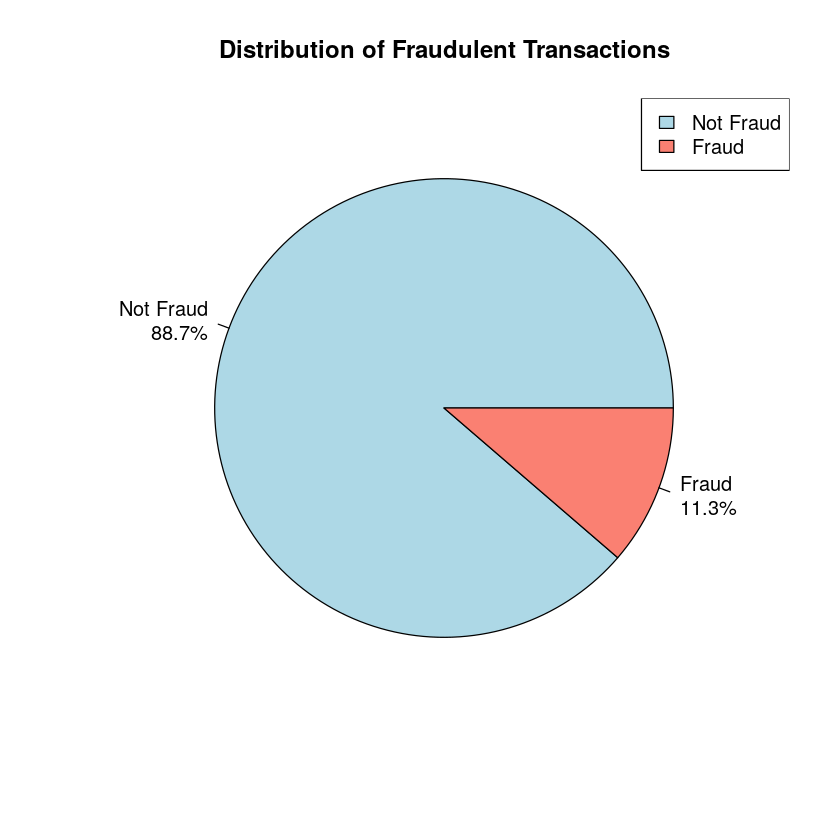

In [11]:
# view the number of transactions by isFraud and non-isFraud
data_fraud <- data %>%
  group_by(isFraud) %>%
  summarise(Total_Transactions = n())

data_fraud

# view the percentage of isFraud in the dataset --------------------------------------
table(data$isFraud) / nrow(data) * 100

# visualize the distribution of isFraud using the pie chart inluding the table --------------------------------------
fraud_counts <- table(data$isFraud)
fraud_labels <- c("Not Fraud", "Fraud")
fraud_colors <- c("lightblue", "salmon")
fraud_percentages <- round(fraud_counts / sum(fraud_counts) * 100, 1)
fraud_labels <- paste(fraud_labels, "\n", fraud_percentages, "%", sep = "")
pie(fraud_counts, labels = fraud_labels, col = fraud_colors, main = "Distribution of Fraudulent Transactions")
legend("topright", legend = c("Not Fraud", "Fraud"), fill = fraud_colors)   

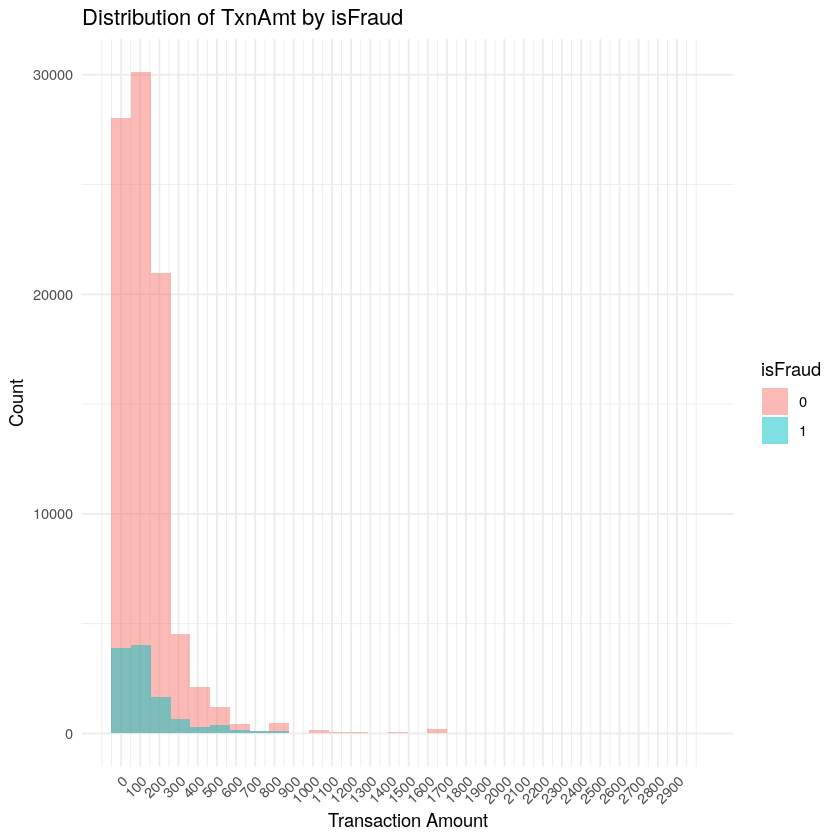

In [12]:
# view the distribution of TxnAmt group by isFraud == 0 and isFraud == 1 
ggplot(data, aes(x = TxnAmt, fill = factor(isFraud))) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Distribution of TxnAmt by isFraud",
       x = "Transaction Amount",
       y = "Count",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

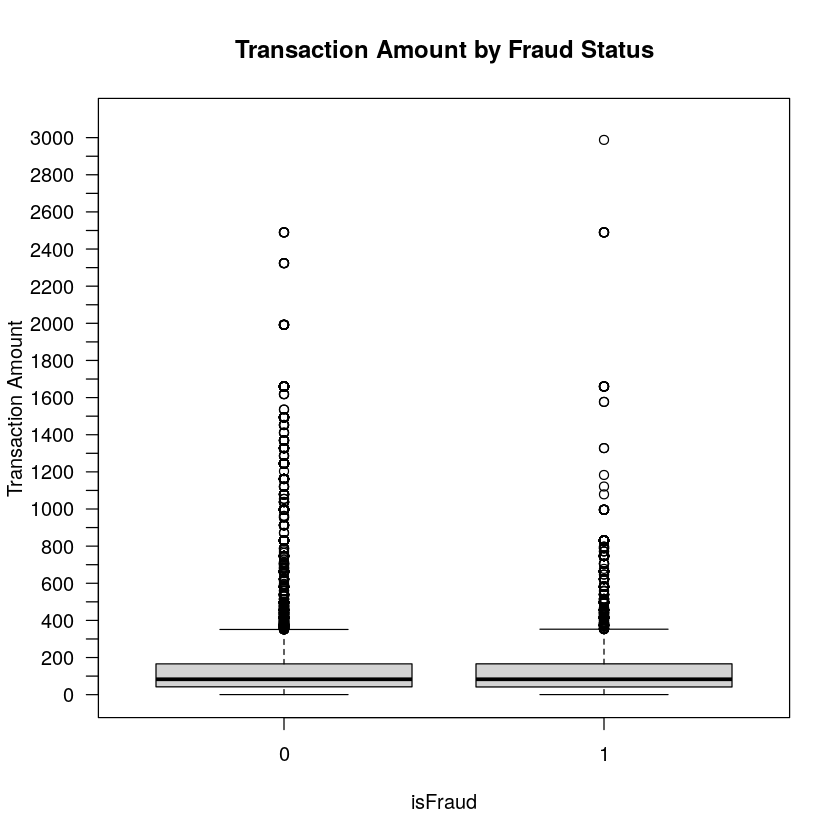

In [13]:
# view the distribution of TxnAmt group by isFraud using boxplots

boxplot(TxnAmt ~ isFraud, data = data, main = "Transaction Amount by Fraud Status", 
        xlab = "isFraud", ylab = "Transaction Amount", ylim=c(0, max(data$TxnAmt, na.rm=TRUE) + 100), yaxt="n")
axis(2, at=seq(0, max(data$TxnAmt, na.rm=TRUE) + 100, by=100), las=2)

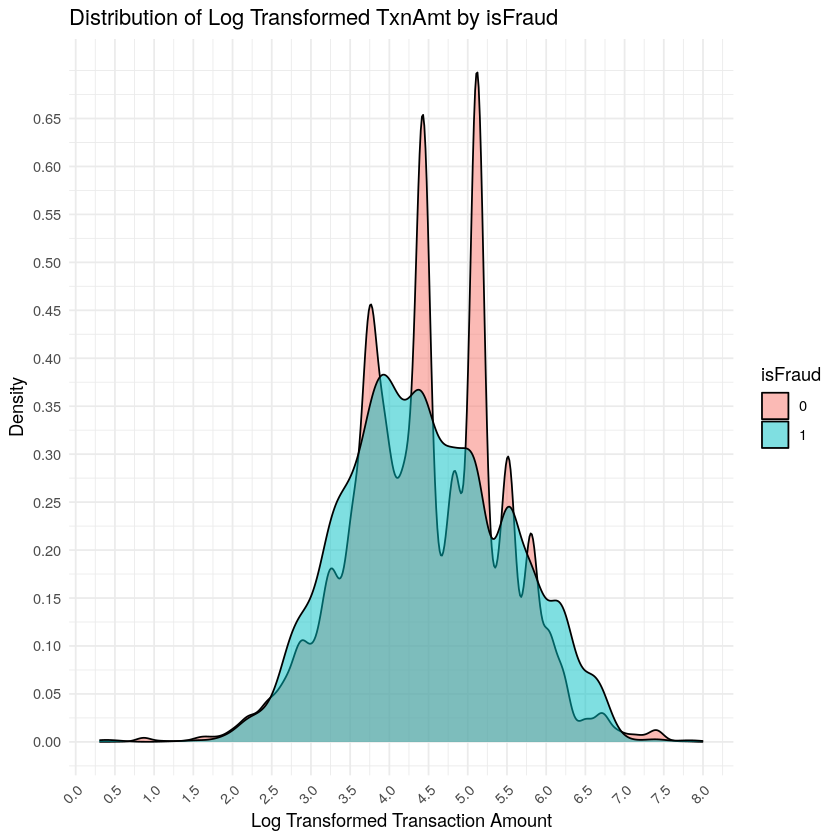

In [14]:
# view the log transformation of TxnAmt and y tick size = 0.05 and  x tick size = 0.5 ------------------------------------------------
data <- data %>% mutate(Log_TxnAmt = log(TxnAmt + 1))  # Adding 1 to avoid log(0) 

ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Log Transformed TxnAmt by isFraud",
       x = "Log Transformed Transaction Amount", 
       y = "Density",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$Log_TxnAmt, na.rm = TRUE), by = 0.5)) +     
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  +
  scale_y_continuous(breaks = seq(0, max(ggplot_build(ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5))$data[[1]]$density, na.rm = TRUE), by = 0.05))

`summarise()` has grouped output by 'isFraud'. You can override using the
`.groups` argument.


isFraud,TxnAmt_Bin,Count,Percentage
<int>,<chr>,<int>,<dbl>
0,0-100,50231,56.64170858
0,100-200,21615,24.37360456
0,200-300,7848,8.84959744
0,300-400,4184,4.71798110
0,400-500,3055,3.44489299
0,500-600,141,0.15899506
0,600-700,365,0.41158296
0,700-800,118,0.13305970
0,800-900,486,0.54802553


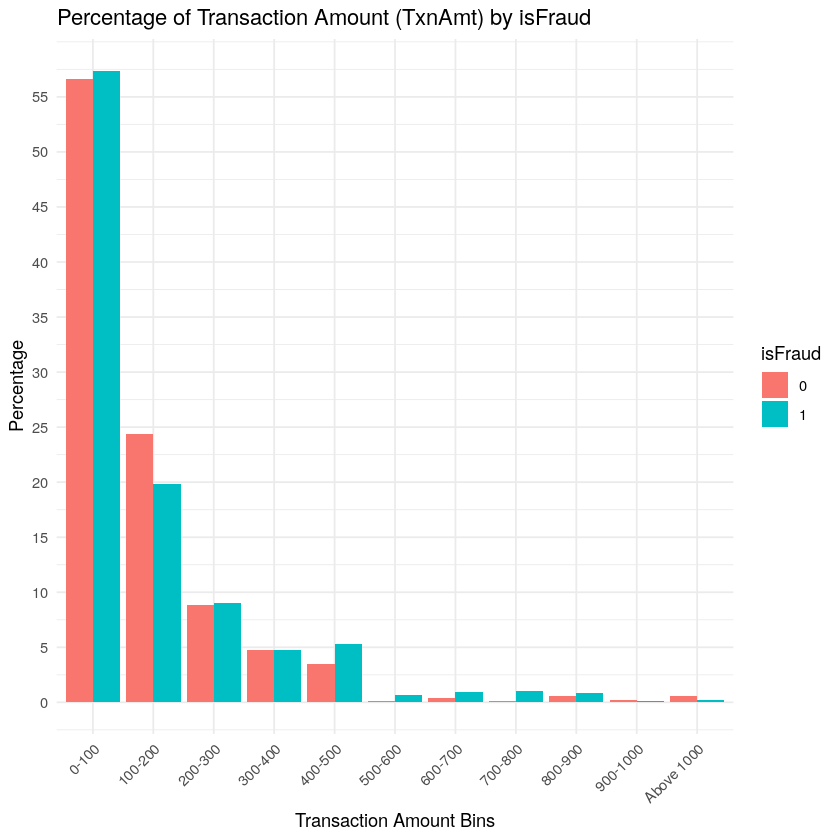

In [15]:
# Visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 where isFraud == 0 and isFraud ==1
data_fraud <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(isFraud, TxnAmt_Bin) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

  data_fraud
  
  
# visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 where isFraud == 0 and isFraud ==1 -----------------------------------------------
ggplot(data_fraud, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) by isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data_fraud$Percentage, na.rm = TRUE), by = 5))

`summarise()` has grouped output by 'TxnAmt_Bin'. You can override using the
`.groups` argument.


TxnAmt_Bin,isFraud,Count,Percentage
<chr>,<int>,<int>,<dbl>
0-100,0,50231,88.550224
0-100,1,6495,11.449776
100-200,0,21615,90.609935
100-200,1,2240,9.390065
200-300,0,7848,88.458070
200-300,1,1024,11.541930
300-400,0,4184,88.625291
300-400,1,537,11.374709
400-500,0,3055,83.675705


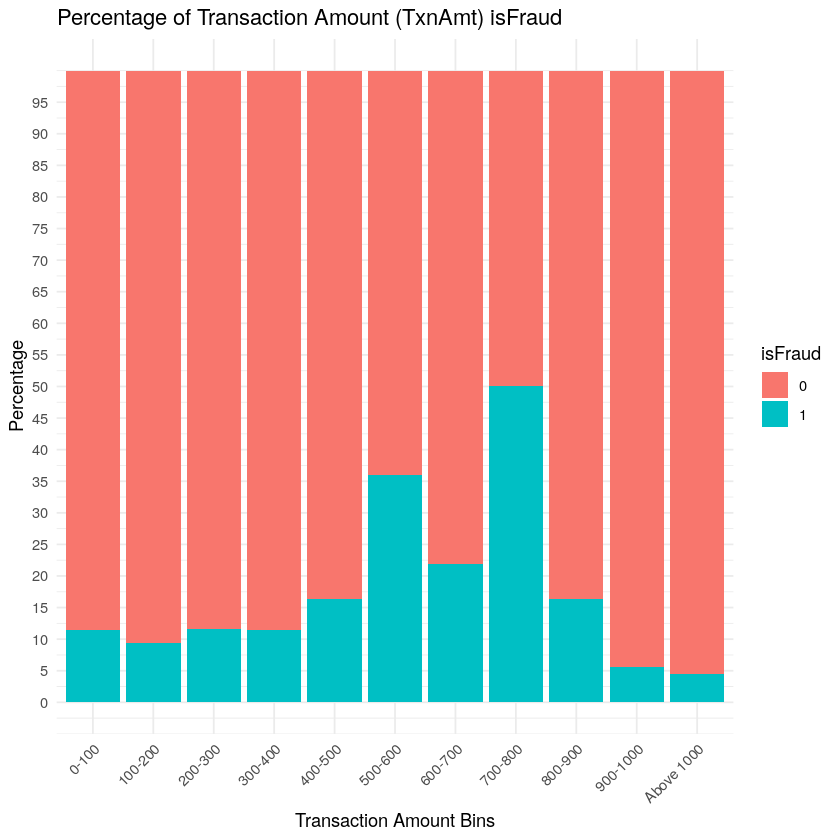

In [16]:
# view TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud ------------------------------------------------
original_data <- data
data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

# print the data frame to check the values
data

# visualize TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

`summarise()` has grouped output by 'TransactionMonth'. You can override using
the `.groups` argument.


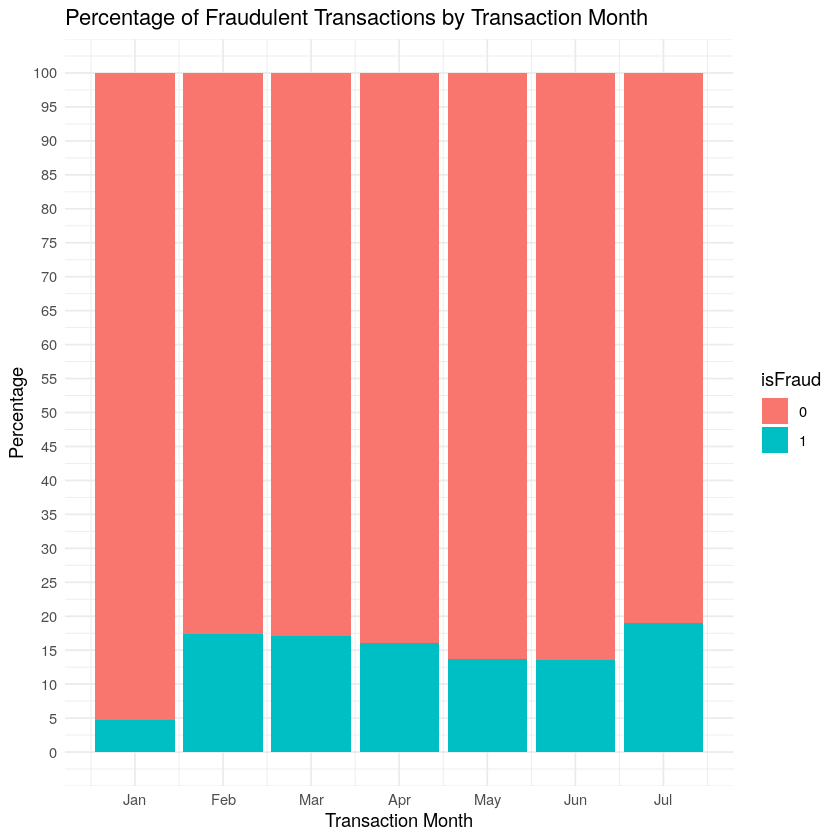

In [17]:
# view the precentage of isFraud and non-fraud by TransactionWeekday ------------------------------------------------
data %>%
  group_by(TransactionMonth, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionMonth, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Month",
       x = "Transaction Month", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 1:12, labels = month.abb)

`summarise()` has grouped output by 'TransactionWeekday'. You can override
using the `.groups` argument.


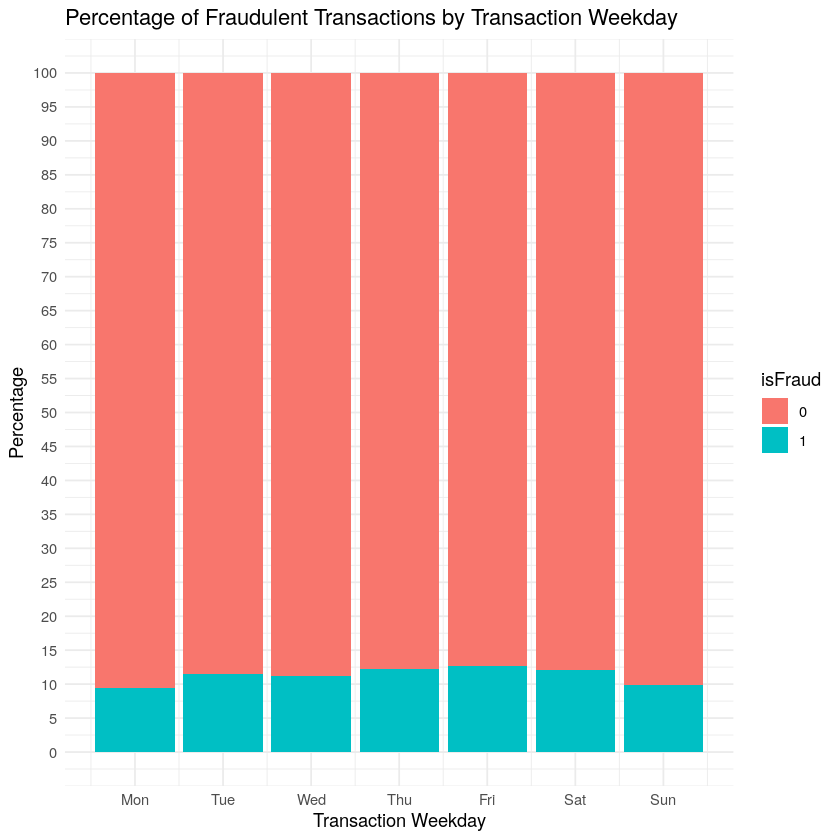

In [18]:
# view the precentage of isFraud and non-fraud by TransactionWeekday ------------------------------------------------
data %>%
  group_by(TransactionWeekday, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionWeekday, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Weekday",
       x = "Transaction Weekday", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 1:7, labels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

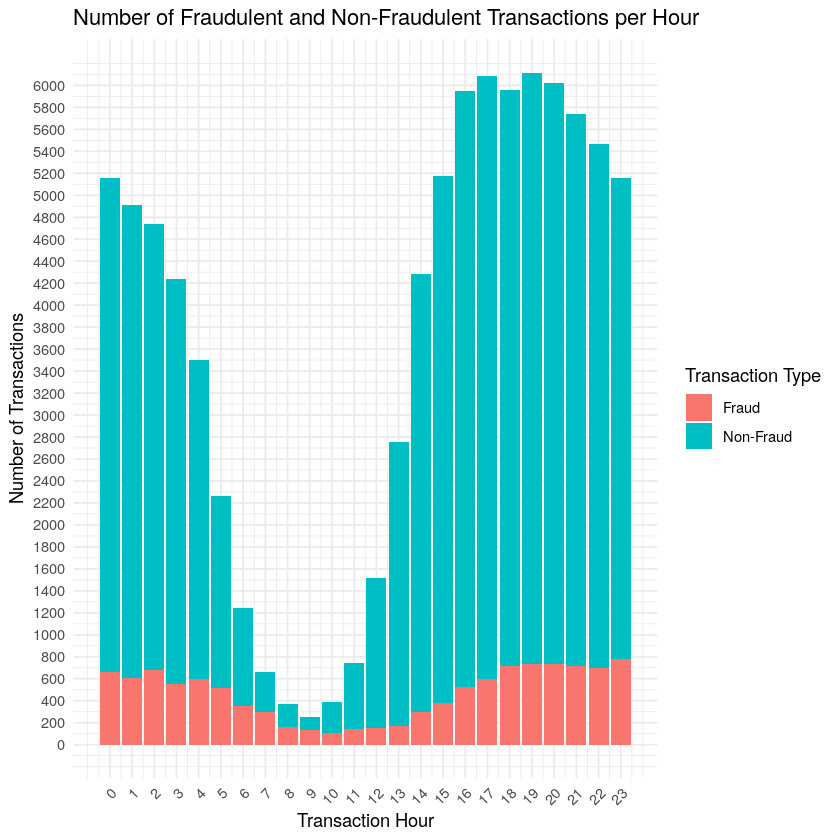

In [19]:
# count the number of transactions per hour ----------------------------------------------
transactions_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(Count = n())

# count the number of isFraud and non-fraud per hour ---------------------------------------------- 
fraud_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per hour with tick-size in y-axis = 200 and x-axis from 0-23 ----------------------------------------------
ggplot(fraud_per_hour, aes(x = TransactionHour)) +
  geom_bar(aes(y = NonFraudCount, fill = "Non-Fraud"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = FraudCount, fill = "Fraud"), stat = "identity", position = "dodge") +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Hour",
       x = "Transaction Hour",
       y = "Number of Transactions",
       fill = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, 23, by = 1)) +
  scale_y_continuous(breaks = seq(0, max(fraud_per_hour$NonFraudCount, fraud_per_hour$FraudCount, na.rm = TRUE), by = 200)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`summarise()` has grouped output by 'TransactionHour'. You can override using
the `.groups` argument.


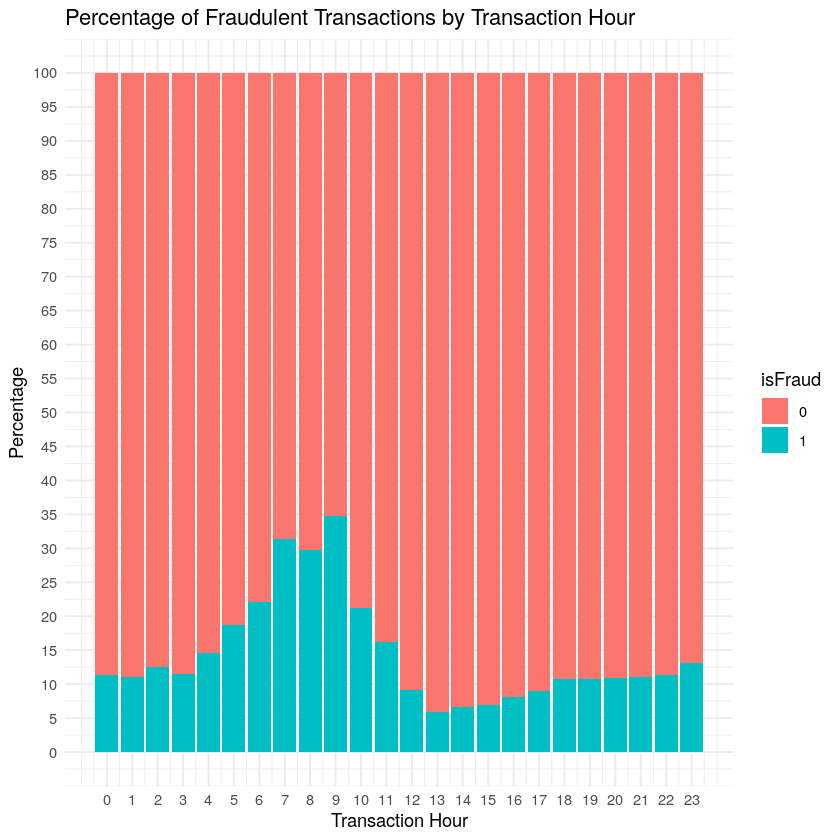

In [20]:
# view the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
fraud_non_fraud_percentage_per_hour <- fraud_per_hour %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)

# visualize the percentage of isFraud and non-fraud by TransactionHour by bar chart ------------------------------------------------
  data %>%
  group_by(TransactionHour, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionHour, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Hour",
       x = "Transaction Hour", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 0:23)

[1] 1231
[1] 7086


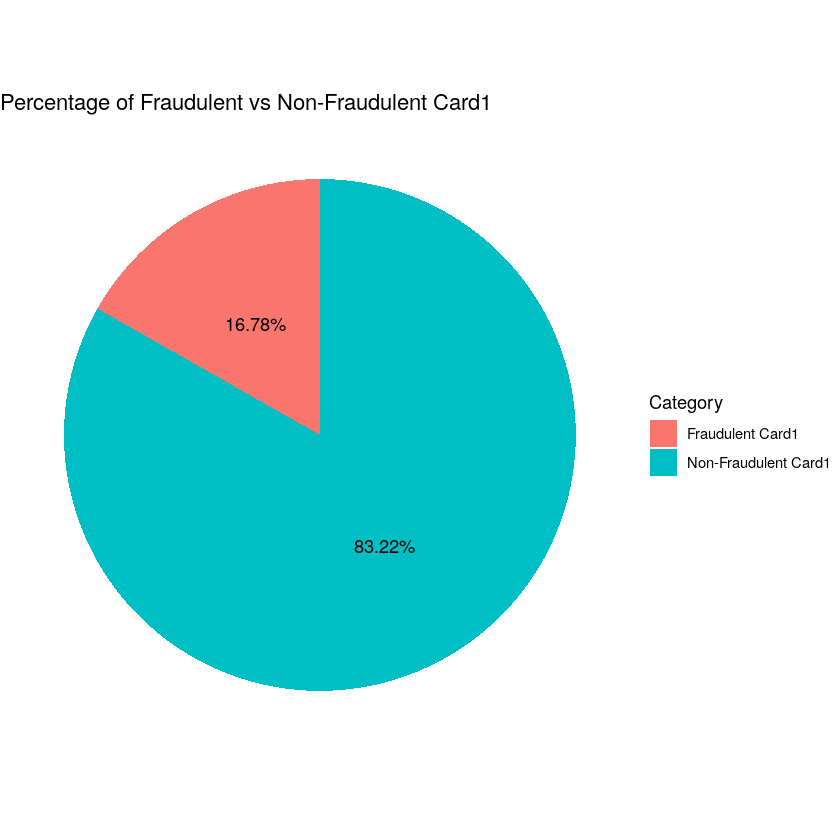

In [21]:
# view the count unique value of Card1 where any isFraud == 1 ------------------------------------------------
fraudulent_card1 <- unique(data$card1[data$isFraud == 1])
num_fraudulent_card1 <- length(fraudulent_card1)
print(num_fraudulent_card1)

non_fraudulent_card1 <- unique(data$card1[data$isFraud == 0])
num_non_fraudulent_card1 <- length(non_fraudulent_card1)
print(num_non_fraudulent_card1)

# view the percentage of fraudulent_card1 in pie chart------------------------------------------------
fraudulent_card1_percentage <- (num_fraudulent_card1 / length(unique(data$card1))) * 100
non_fraudulent_card1_percentage <- 100 - fraudulent_card1_percentage
pie_data <- data.frame(
  Category = c("Fraudulent Card1", "Non-Fraudulent Card1"),
  Percentage = c(fraudulent_card1_percentage, non_fraudulent_card1_percentage)
)
ggplot(pie_data, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card1") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5)) 

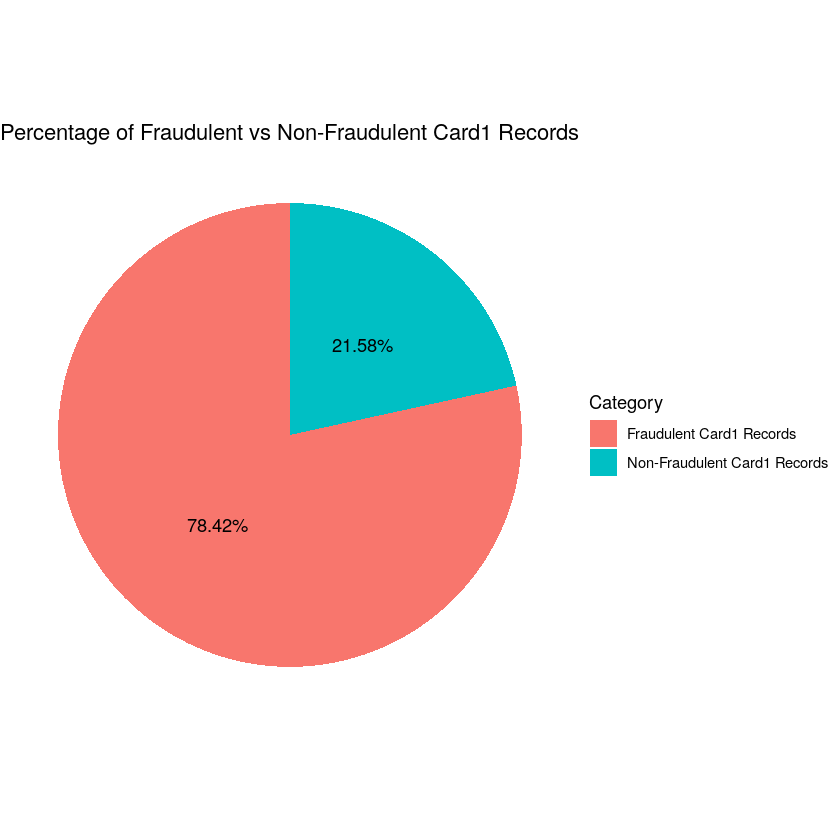

In [22]:
# visualize the percentage of total no of record presented by fradulent_card1
total_records <- nrow(data)
fraudulent_card1_records <- nrow(data[data$card1 %in% fraudulent_card1, ])
fraudulent_card1_record_percentage <- (fraudulent_card1_records / total_records) * 100
non_fraudulent_card1_record_percentage <- 100 - fraudulent_card1_record_percentage
pie_data_records <- data.frame(
  Category = c("Fraudulent Card1 Records", "Non-Fraudulent Card1 Records"),
  Percentage = c(fraudulent_card1_record_percentage, non_fraudulent_card1_record_percentage)
)
ggplot(pie_data_records, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) + 
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card1 Records") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5)) 

`summarise()` has grouped output by 'TransactionMonth'. You can override using
the `.groups` argument.


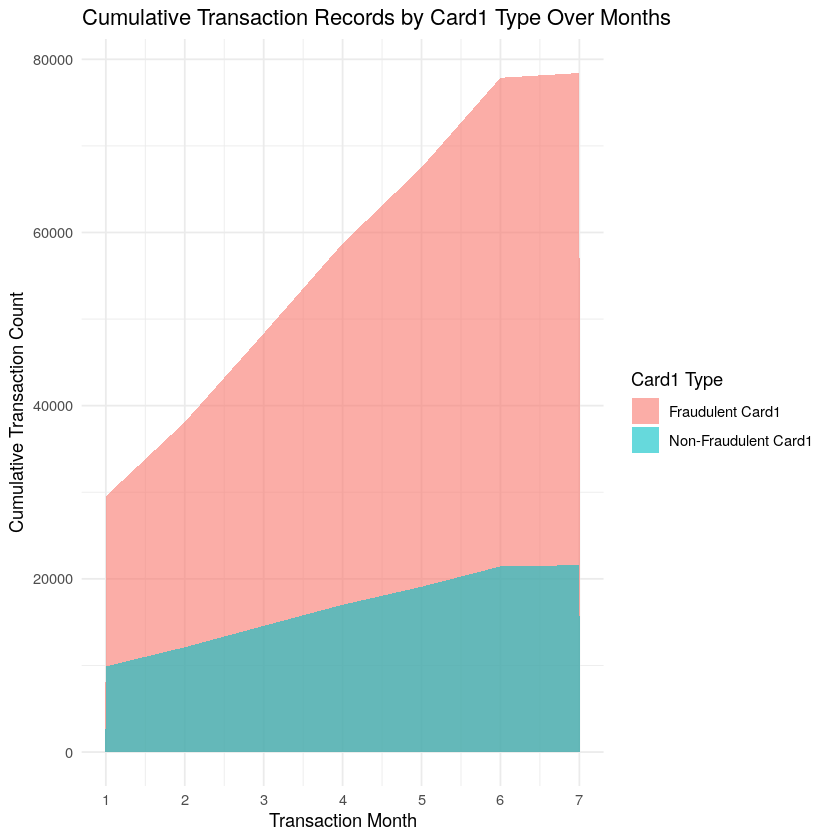

In [23]:
# visualize the cumulative transaction record performed by Fraudulent Card1 over transaction month
fraudulent_card1_monthly <- data %>%
  mutate(Card1Type = ifelse(card1 %in% fraudulent_card1, "Fraudulent Card1", "Non-Fraudulent Card1")) %>%
  group_by(TransactionMonth, Card1Type) %>%
  summarise(MonthlyCount = n()) %>%
  arrange(TransactionMonth) %>%
  group_by(Card1Type) %>%
  mutate(CumulativeCount = cumsum(MonthlyCount))

# Create area plot
ggplot(fraudulent_card1_monthly, aes(x = TransactionMonth, y = CumulativeCount, fill = Card1Type)) +
  geom_area(alpha = 0.6 , position = 'identity') +
  scale_x_continuous(breaks = 1:12) +
  labs(title = "Cumulative Transaction Records by Card1 Type Over Months",
       x = "Transaction Month",
       y = "Cumulative Transaction Count",
       fill = "Card1 Type") +
  theme_minimal()

In [24]:
# create a column to indicate the card is fraudulent_card1
data <- data %>%
  mutate(fraudulent_card1 = ifelse(card1 %in% fraudulent_card1, 1, 0))

# view the monthly no of transaction for each record of card1 
monthly_card1_transactions <- data %>%
  group_by(TransactionMonth, card1) %>%
  summarise(MonthlyCount = n()) %>%
  arrange(TransactionMonth, desc(MonthlyCount))

# add a column in monthly_card1_transactions to indicate the card is fraudulent_card1 in unique value
monthly_card1_transactions <- monthly_card1_transactions %>%
  mutate(fraudulent_card1 = ifelse(card1 %in% unique(fraudulent_card1), 1, 0))

# average the MonthlyCount group by TransactionMonth and fraudulent_card1
avg_monthly_card1_transactions <- monthly_card1_transactions %>%
  group_by(TransactionMonth, fraudulent_card1) %>%
  summarise(AverageMonthlyCount = mean(MonthlyCount)) %>%
  arrange(TransactionMonth, fraudulent_card1)


# average the avg_monthly_card1_transactions group by fraudulent_card1
overall_avg_monthly_card1_transactions <- avg_monthly_card1_transactions %>%
  group_by(fraudulent_card1) %>%
  summarise(OverallAverageMonthlyCount = mean(AverageMonthlyCount))
print(overall_avg_monthly_card1_transactions)


`summarise()` has grouped output by 'TransactionMonth'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'TransactionMonth'. You can override using
the `.groups` argument.


# A tibble: 2 × 2
  fraudulent_card1 OverallAverageMonthlyCount
             <dbl>                      <dbl>
1                0                       1.84
2                1                      14.9 


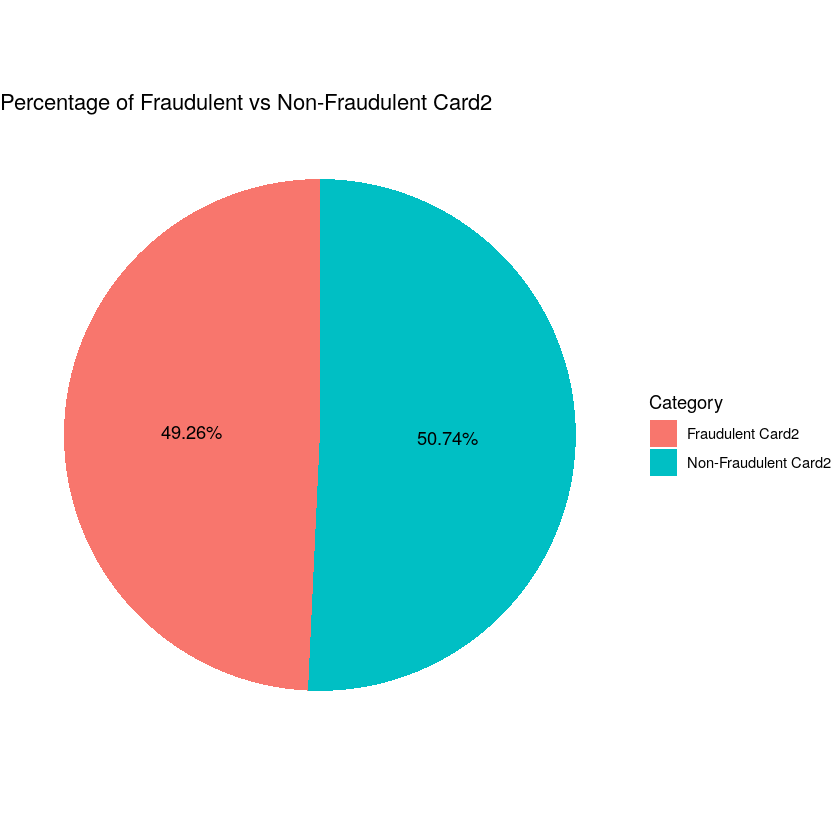

In [25]:
# view the count unique value of Card2 where any isFraud == 1
fraudulent_card2 <- unique(data$card2[data$isFraud == 1])
num_fraudulent_card2 <- length(fraudulent_card2)

# view the percentage of fraudulent_card2 in pie chart
fraudulent_card2_percentage <- (num_fraudulent_card2 / length(unique(data$card2))) * 100
non_fraudulent_card2_percentage <- 100 - fraudulent_card2_percentage
pie_data_card2 <- data.frame(
  Category = c("Fraudulent Card2", "Non-Fraudulent Card2"),
  Percentage = c(fraudulent_card2_percentage, non_fraudulent_card2_percentage)
)
ggplot(pie_data_card2, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card2") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5))

[1] 57


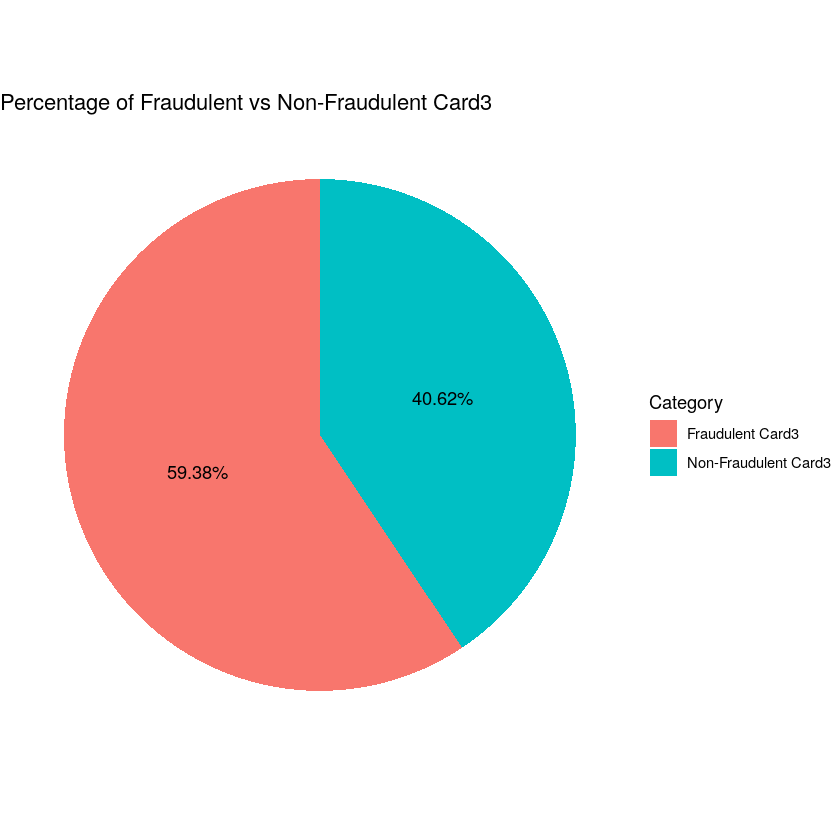

In [26]:
# view the count unique value of Card3 where any isFraud == 1
fraudulent_card3 <- unique(data$card3[data$isFraud == 1])
num_fraudulent_card3 <- length(fraudulent_card3)
print(num_fraudulent_card3)

# view the percentage of fraudulent_card3 in pie chart
fraudulent_card3_percentage <- (num_fraudulent_card3 / length(unique(data$card3))) * 100
non_fraudulent_card3_percentage <- 100 - fraudulent_card3_percentage
pie_data_card3 <- data.frame(
  Category = c("Fraudulent Card3", "Non-Fraudulent Card3"),
  Percentage = c(fraudulent_card3_percentage, non_fraudulent_card3_percentage)
)
ggplot(pie_data_card3, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card3") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5))

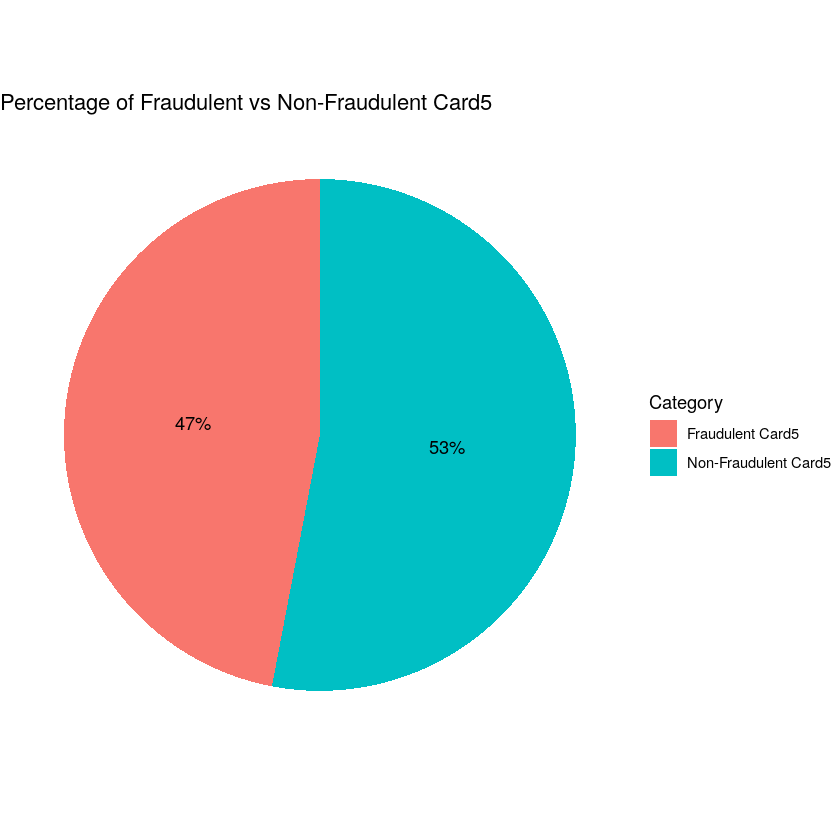

In [27]:
# view the count unique value of Card5 where any isFraud == 1
fraudulent_card5 <- unique(data$card5[data$isFraud == 1])
num_fraudulent_card5 <- length(fraudulent_card5)

# view the percentage of fraudulent_card5 in pie chart
fraudulent_card5_percentage <- (num_fraudulent_card5 / length(unique(data$card5))) * 100
non_fraudulent_card5_percentage <- 100 - fraudulent_card5_percentage
pie_data_card5 <- data.frame(
  Category = c("Fraudulent Card5", "Non-Fraudulent Card5"),
  Percentage = c(fraudulent_card5_percentage, non_fraudulent_card5_percentage)
)
ggplot(pie_data_card5, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentage of Fraudulent vs Non-Fraudulent Card5") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), 
            position = position_stack(vjust = 0.5))

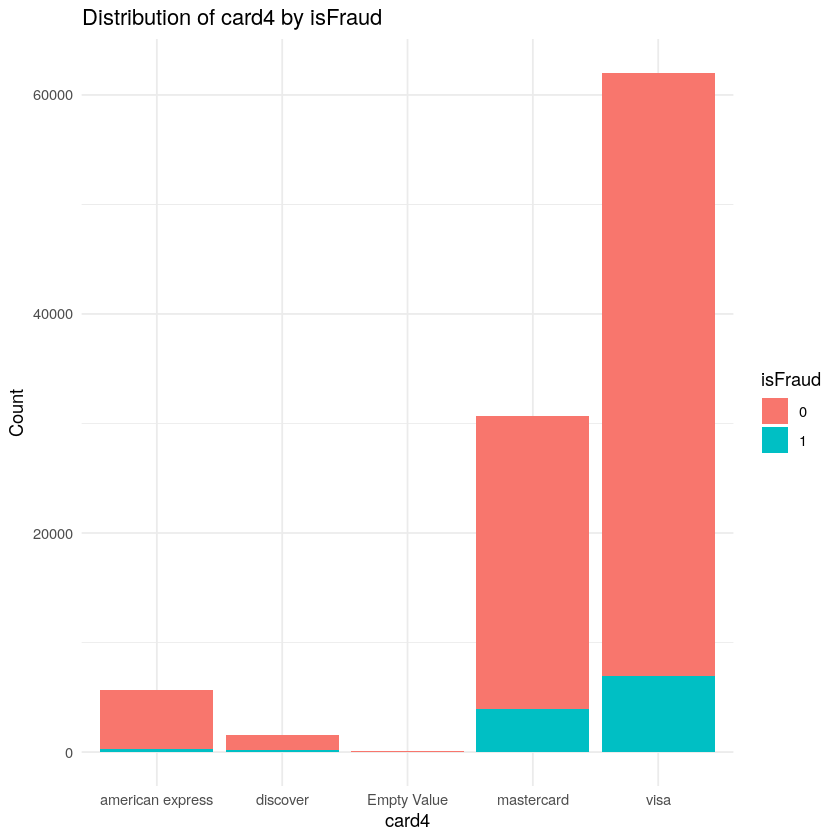

In [28]:
# view the distribution of card4 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card4, fill = factor(isFraud))) +
  geom_bar() +
  labs(title = "Distribution of card4 by isFraud",
       x = "card4",
       y = "Count",
       fill = "isFraud") +
  theme_minimal()

# A tibble: 5 × 5
  card4            FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                 <int>         <int>           <dbl>              <dbl>
1 Empty Value              14           109           11.4                88.6
2 american express        239          5400            4.24               95.8
3 discover                177          1375           11.4                88.6
4 mastercard             3920         26760           12.8                87.2
5 visa                   6968         55038           11.2                88.8


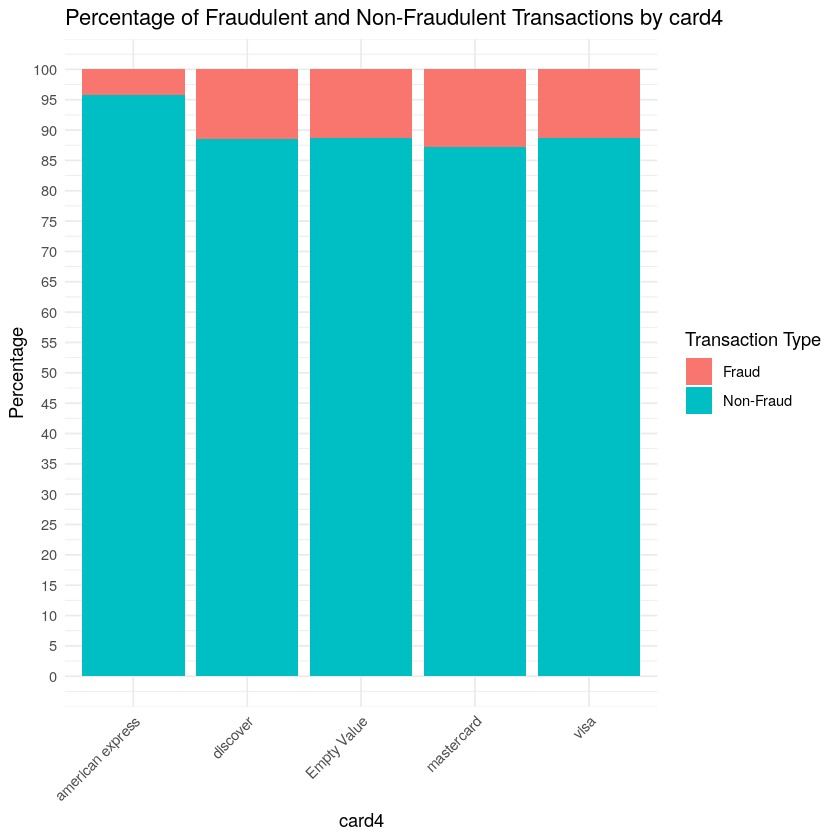

In [ ]:
# view the percentage of card4 group by isFraud ------------------------------------------------
card4_fraud_percentage <- data %>%
  group_by(card4) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card4_fraud_percentage)

# visualize the percentage of isFraud and non-fraud by card4 by bar chart ------------------------------------------------
card4_plot_data <- card4_fraud_percentage %>%
  select(card4, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(card4_plot_data, aes(x = card4, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by card4",
       x = "card4",
       y = "Percentage",
       fill = "Transaction Type")

# A tibble: 4 × 5
  card6       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value         12           106           10.2                89.8
2 charge card          0             9            0                 100  
3 credit            6693         45585           12.8                87.2
4 debit             4613         42982            9.69               90.3


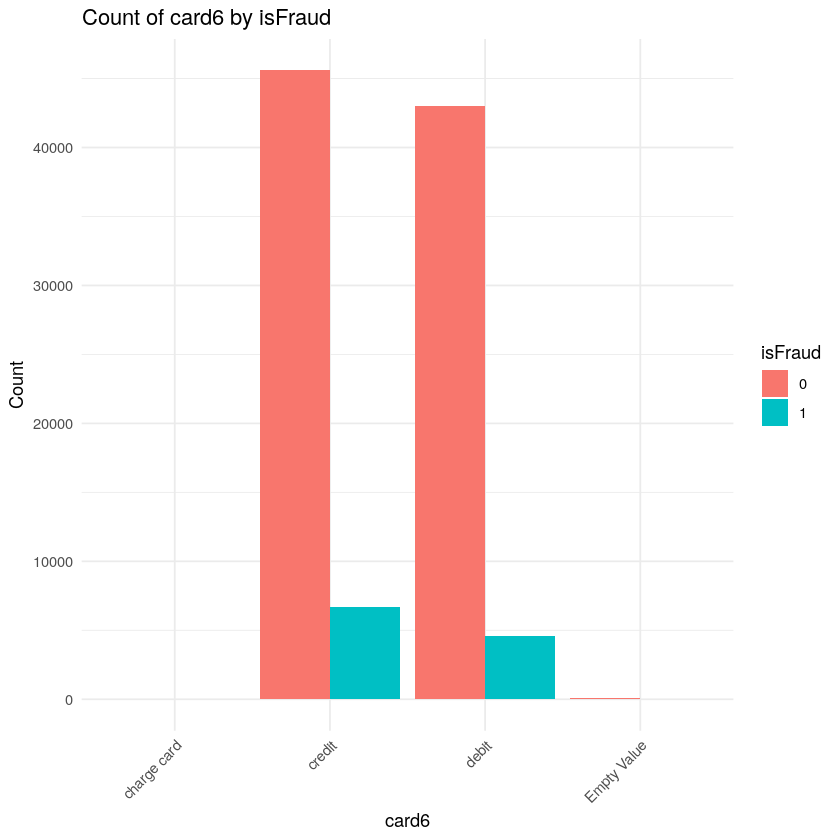

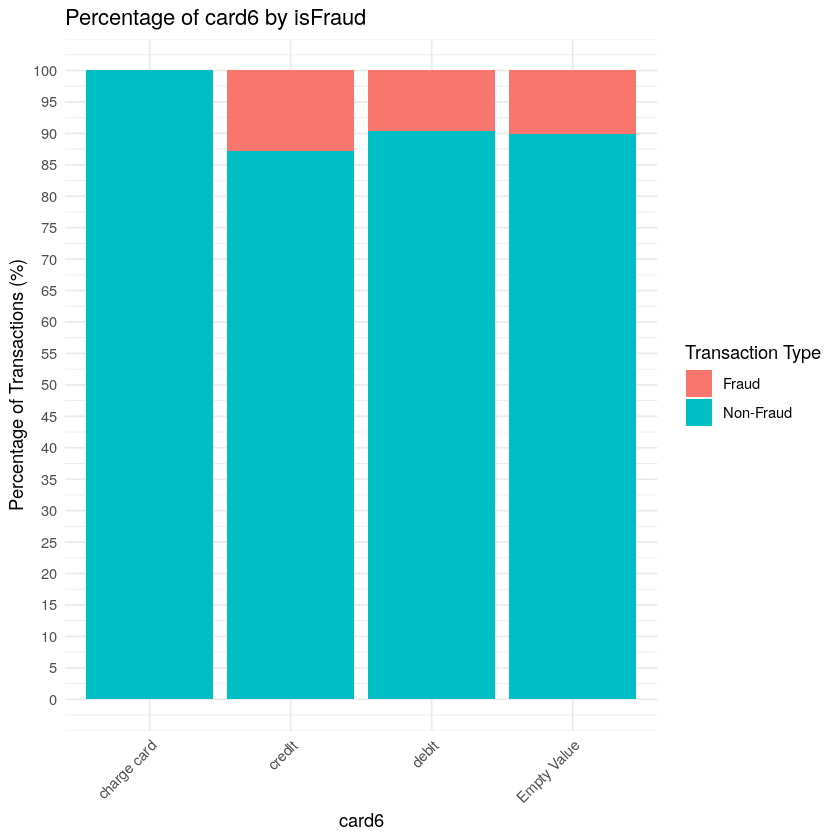

In [ ]:
# view the percentage of card6 group by isFraud ------------------------------------------------
card6_fraud_percentage <- data %>%
  group_by(card6) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card6_fraud_percentage)


# visualize the count of card6 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card6, fill = factor(isFraud))) +
  geom_bar(position = "dodge") +
  labs(title = "Count of card6 by isFraud",
       x = "card6",
       y = "Count",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
# visualize the percentage of card6 group by isFraud ------------------------------------------------
card6_plot_data <- card6_fraud_percentage %>%
  select(card6, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  )) 

  # Create the plot with proper dodged bars
ggplot(card6_plot_data, aes(x = card6, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +

  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card6 by isFraud",
       x = "card6",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 5 × 6
  has_card2 has_card3 has_card5 count combination      percentage
  <lgl>     <lgl>     <lgl>     <int> <chr>                 <dbl>
1 FALSE     FALSE     FALSE        12 None of any Card     0.106 
2 FALSE     TRUE      FALSE         2 Card3 Only           0.0177
3 FALSE     TRUE      TRUE        224 Card3 + Card5        1.98  
4 TRUE      TRUE      FALSE        52 Card2 + Card3        0.459 
5 TRUE      TRUE      TRUE      11028 All Three Cards     97.4   


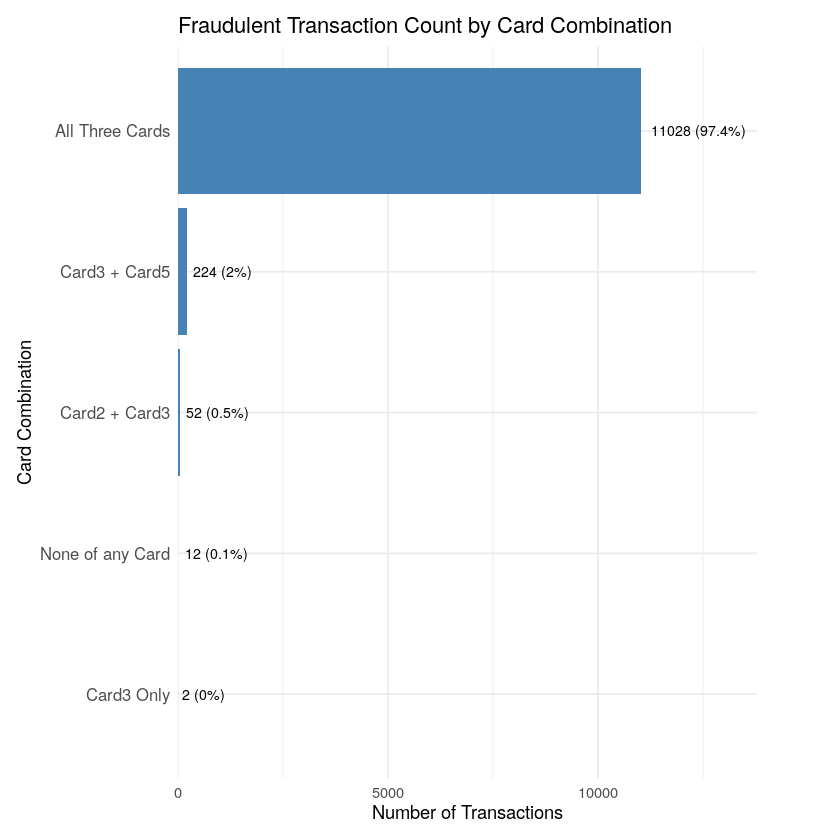

In [31]:
# Enhanced card intersection analysis
# Create a comprehensive analysis of card combinations in fraudulent transactions
fraud_data <- data %>% filter(isFraud == 1)

# Count transactions by card availability
card_combinations <- fraud_data %>%
  mutate(
    has_card2 = !is.na(card2),
    has_card3 = !is.na(card3), 
    has_card5 = !is.na(card5)
  ) %>%
  group_by(has_card2, has_card3, has_card5) %>%
  summarise(count = n(), .groups = 'drop') %>%
  mutate(
    combination = case_when(
      has_card2 & has_card3 & has_card5 ~ "All Three Cards",
      has_card2 & has_card3 & !has_card5 ~ "Card2 + Card3",
      has_card2 & !has_card3 & has_card5 ~ "Card2 + Card5", 
      !has_card2 & has_card3 & has_card5 ~ "Card3 + Card5",
      has_card2 & !has_card3 & !has_card5 ~ "Card2 Only",
      !has_card2 & has_card3 & !has_card5 ~ "Card3 Only",
      !has_card2 & !has_card3 & has_card5 ~ "Card5 Only",
      TRUE ~ "None of any Card"
    ),
    percentage = (count / sum(count)) * 100
  )

print(card_combinations)

# Visualize card combinations with proper spacing
ggplot(card_combinations, aes(x = reorder(combination, count), y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Fraudulent Transaction Count by Card Combination",
       x = "Card Combination",
       y = "Number of Transactions") +
  theme_minimal() +
  geom_text(aes(label = paste0(count, " (", round(percentage, 1), "%)")), 
            hjust = -0.1, size = 3) +
  # Expand plot limits to accommodate text labels
  scale_y_continuous(expand = expansion(mult = c(0, 0.25))) +
  # Ensure all labels are visible
  theme(
    plot.margin = margin(10, 50, 10, 10),  # top, right, bottom, left
    axis.text.y = element_text(size = 10)
  )
  

# A tibble: 4 × 5
  ProductCD FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>          <int>         <int>           <dbl>              <dbl>
1 AD               684          7255            8.62               91.4
2 LY              7640         36492           17.3                82.7
3 TP              1571         20835            7.01               93.0
4 WF              1423         24100            5.58               94.4


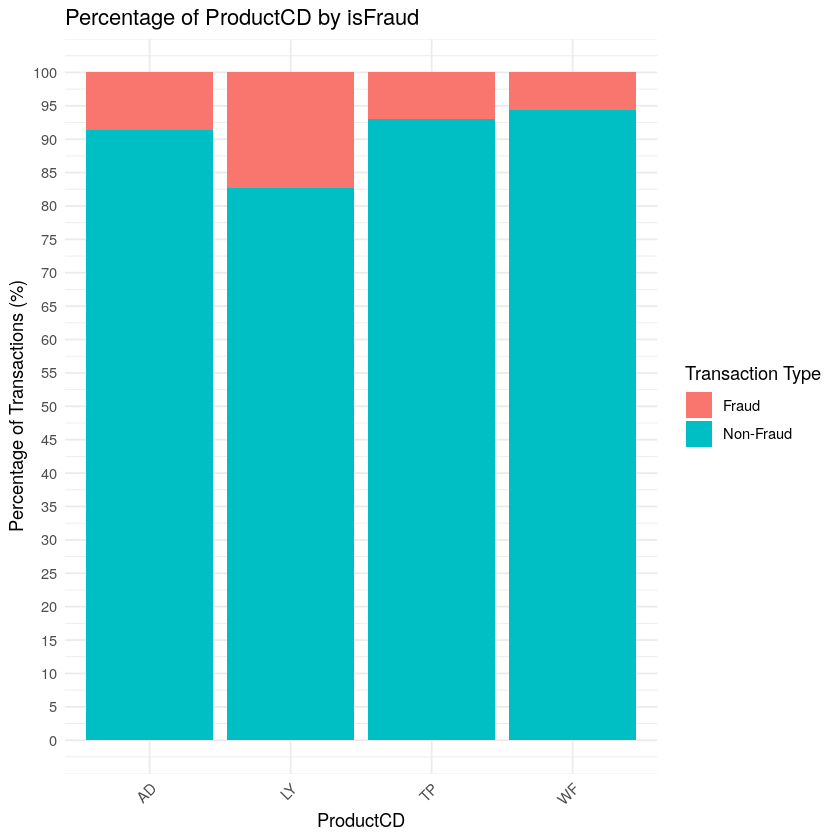

In [ ]:
# view the percentage of ProductCD group by isFraud ------------------------------------------------
productcd_fraud_percentage <- data %>%
  group_by(ProductCD) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(productcd_fraud_percentage)   

# visualize the percentage of ProductCD group by isFraud ------------------------------------------------
productcd_plot_data <- productcd_fraud_percentage %>%
  select(ProductCD, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(productcd_plot_data, aes(x = ProductCD, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 2 × 5
  addr1_is_na FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 NA                7433         35448           17.3                82.7
2 Not NA            3885         53234            6.80               93.2


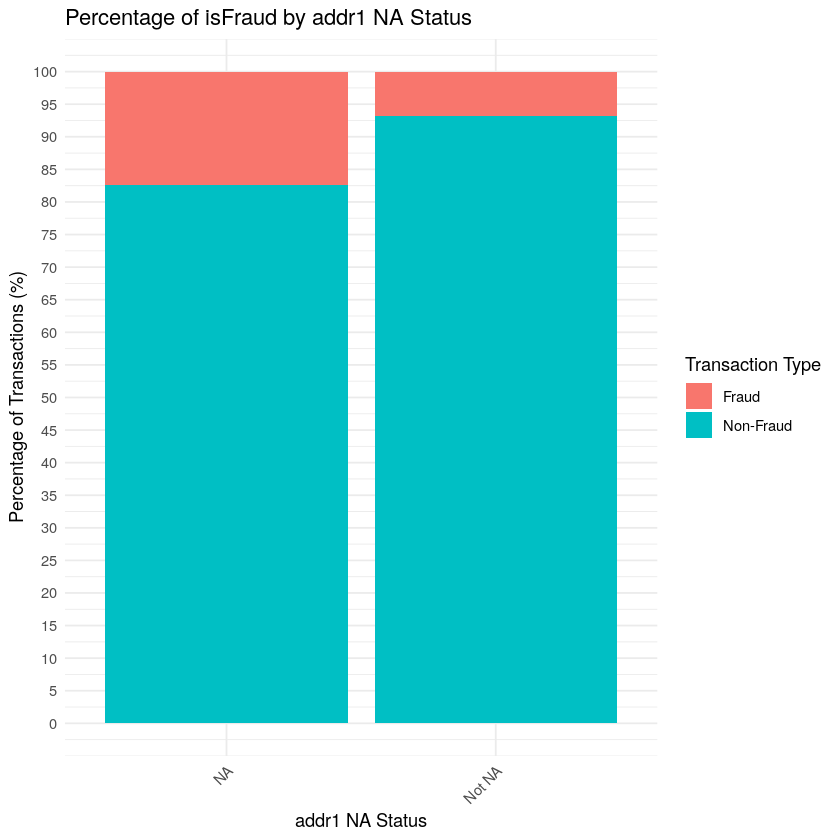

In [ ]:
# view the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
addr1_fraud_summary <- data %>%
  mutate(addr1_is_na = ifelse(is.na(addr1), "NA", "Not NA")) %>%
  group_by(addr1_is_na) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(addr1_fraud_summary)

# visualize the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
addr1_plot_data <- addr1_fraud_summary %>%
  select(addr1_is_na, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(addr1_plot_data, aes(x = addr1_is_na, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of isFraud by addr1 NA Status",
       x = "addr1 NA Status",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 10 × 5
   P_emaildomain FraudCount NonFraudCount FraudPercentage NonFraudPercentage
   <chr>              <int>         <int>           <dbl>              <dbl>
 1 AOL                   83          2815           2.86                97.1
 2 AT&T                   4           977           0.408               99.6
 3 Apple                119          1230           8.82                91.2
 4 CenturyLink            0            81           0                  100  
 5 Empty Value          962          8296          10.4                 89.6
 6 Google              6265         32029          16.4                 83.6
 7 Microsoft           2612         19371          11.9                 88.1
 8 Others               748         14478           4.91                95.1
 9 Spectrum               3           194           1.52                98.5
10 Yahoo                522          9211           5.36                94.6


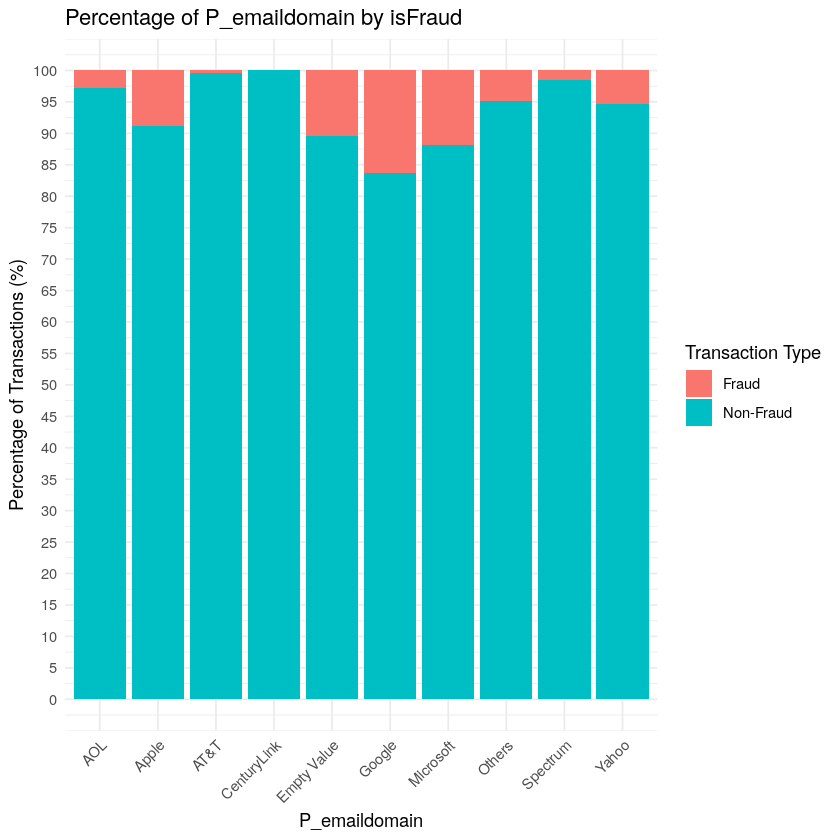

In [ ]:
# view the percentage of P_emaildomain group by isFraud ------------------------------------------------
emaildomain_fraud_percentage <- data %>%
  group_by(P_emaildomain) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(emaildomain_fraud_percentage)

# visualize the percentage of P_emaildomain group by isFraud ------------------------------------------------
emaildomain_plot_data <- emaildomain_fraud_percentage %>%
  select(P_emaildomain, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage),   
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud", 
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(emaildomain_plot_data, aes(x = P_emaildomain, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by =  5)) +
  labs(title = "Percentage of P_emaildomain by isFraud",
       x = "P_emaildomain",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 10 × 5
   R_emaildomain FraudCount NonFraudCount FraudPercentage NonFraudPercentage
   <chr>              <int>         <int>           <dbl>              <dbl>
 1 AOL                  129          2407           5.09                94.9
 2 AT&T                   2           756           0.264               99.7
 3 Apple                192          1286          13.0                 87.0
 4 CenturyLink            0            69           0                  100  
 5 Empty Value          432          8418           4.88                95.1
 6 Google              6628         32416          17.0                 83.0
 7 Microsoft           2597         18823          12.1                 87.9
 8 Others               708         15420           4.39                95.6
 9 Spectrum               5           108           4.42                95.6
10 Yahoo                625          8979           6.51                93.5


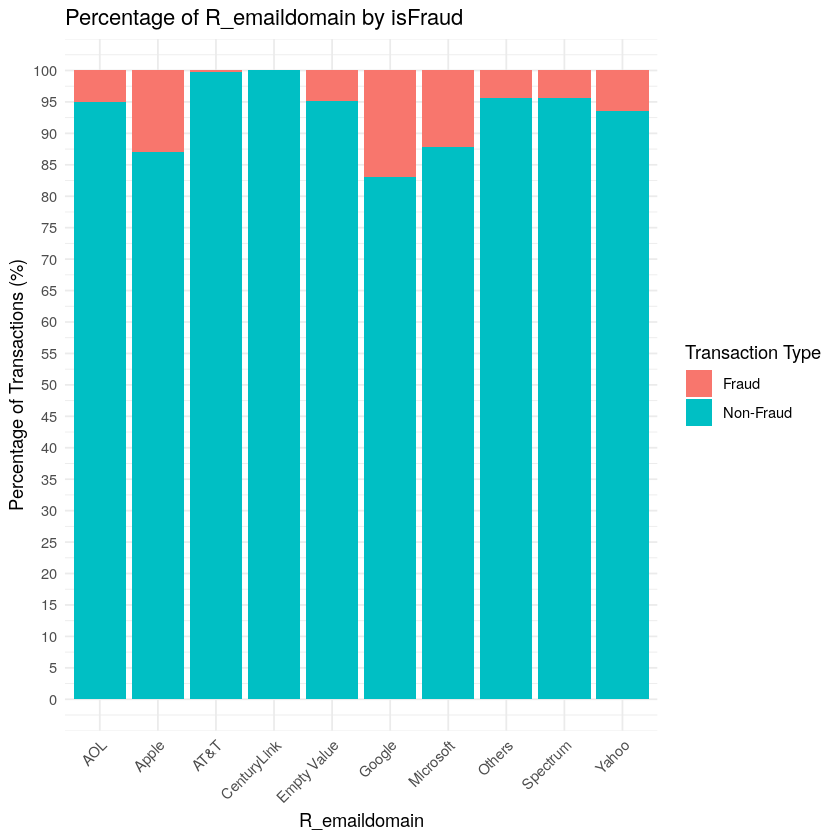

In [ ]:
# view the percentage of R_emaildomain group by isFraud ------------------------------------------------
remaildomain_fraud_percentage <- data %>%
  group_by(R_emaildomain) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(remaildomain_fraud_percentage)
# visualize the percentage of R_emaildomain group by isFraud ------------------------------------------------
remaildomain_plot_data <- remaildomain_fraud_percentage %>%
  select(R_emaildomain, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(remaildomain_plot_data, aes(x = R_emaildomain, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of R_emaildomain by isFraud",
       x = "R_emaildomain",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


Correlations between valid C columns and isFraud:
     C1      C2      C3      C4      C6      C7      C8     C10     C11     C12 
 0.0397  0.0466 -0.0295  0.0265  0.0265  0.0286  0.0319  0.0253  0.0337  0.0346 
    C13     C14 
 0.0150  0.0164 


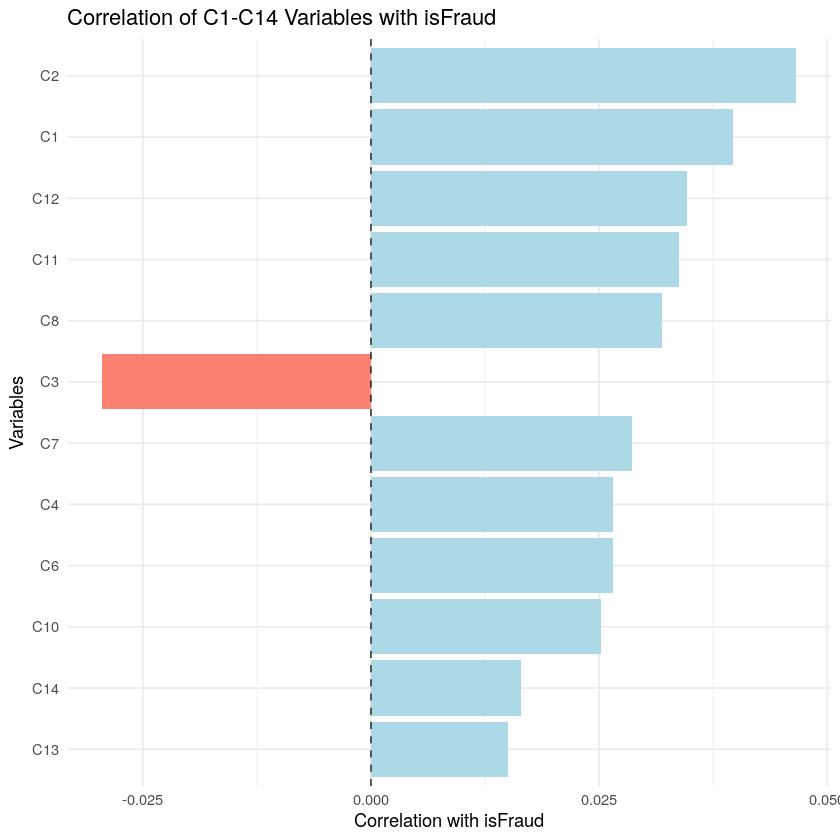

In [ ]:
# view the correlation matrix between column from C1 to C14 vs isFraud ------------------------------------------------
numeric_c_columns <- paste0("C", 1:14)

# Check which columns exist and have variance > 0
existing_c_columns <- intersect(numeric_c_columns, names(data))
valid_c_columns <- c()

for(col in existing_c_columns) {
  if(is.numeric(data[[col]]) && var(data[[col]], na.rm = TRUE) > 0) {
    valid_c_columns <- c(valid_c_columns, col)
  }
}

if(length(valid_c_columns) > 0) {
  correlations_with_fraud <- data %>%
    select(all_of(valid_c_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  fraud_correlations_C <- correlations_with_fraud[valid_c_columns, "isFraud"]
  
  cat("\nCorrelations between valid C columns and isFraud:\n")
  print(round(fraud_correlations_C, 4))
  
  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations_C),
    Correlation = as.numeric(fraud_correlations_C)
  )

  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "lightblue", "salmon")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)
    
} else {
  cat("No valid C columns found with non-zero variance.\n")
}


Correlations between D1, D8, D9, D11 and isFraud:
     D1      D8      D9 
-0.0747 -0.1687 -0.0502 


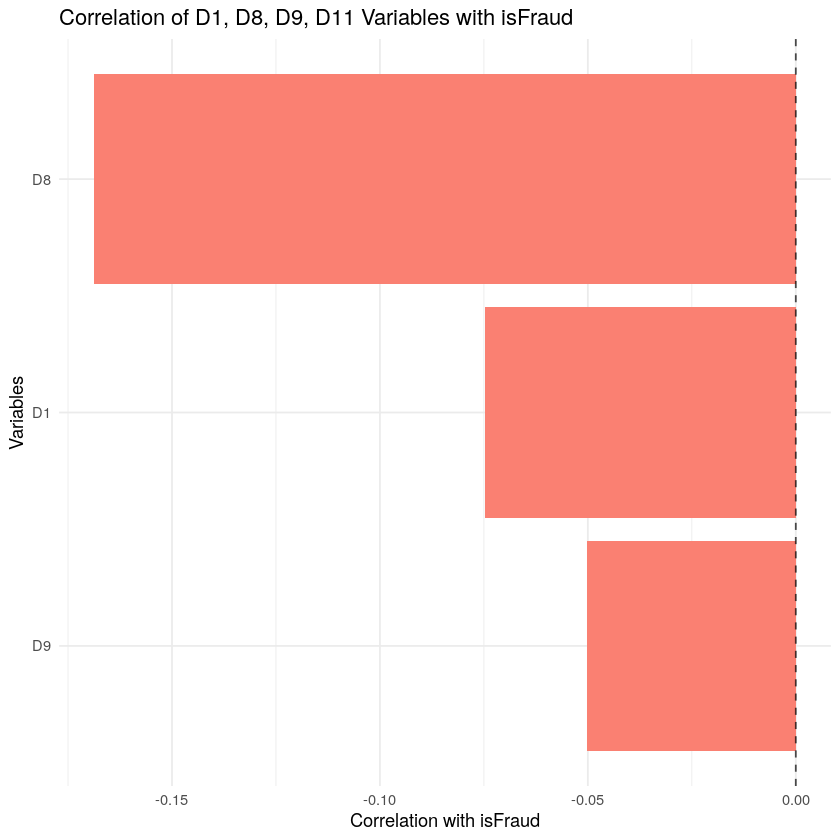

In [ ]:
# view the correlation matrix between column from D1 to D15 vs isFraud ------------------------------------------------
d_column_names <- paste0("D", c(1,8,9,11))

numeric_d_columns <- data %>% 
  select(all_of(d_column_names)) %>%
  select_if(is.numeric) %>%
  names()

  correlations_with_fraud <- data %>%
    select(all_of(numeric_d_columns), isFraud) %>%
    cor(use = "complete.obs")

  fraud_correlations_D <- correlations_with_fraud[numeric_d_columns, "isFraud"]
  
  cat("\nCorrelations between D1, D8, D9, D11 and isFraud:\n")
  print(round(fraud_correlations_D, 4))
  

  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations_D),
    Correlation = as.numeric(fraud_correlations_D)
  )
 
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "lightblue", "salmon")) +
    coord_flip() +
    labs(title = "Correlation of D1, D8, D9, D11 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)


Correlations between V310, V311, V312, V313, V314 and isFraud:
   V310    V311    V312    V313    V314 
-0.0219 -0.0054 -0.0133 -0.0031 -0.0158 


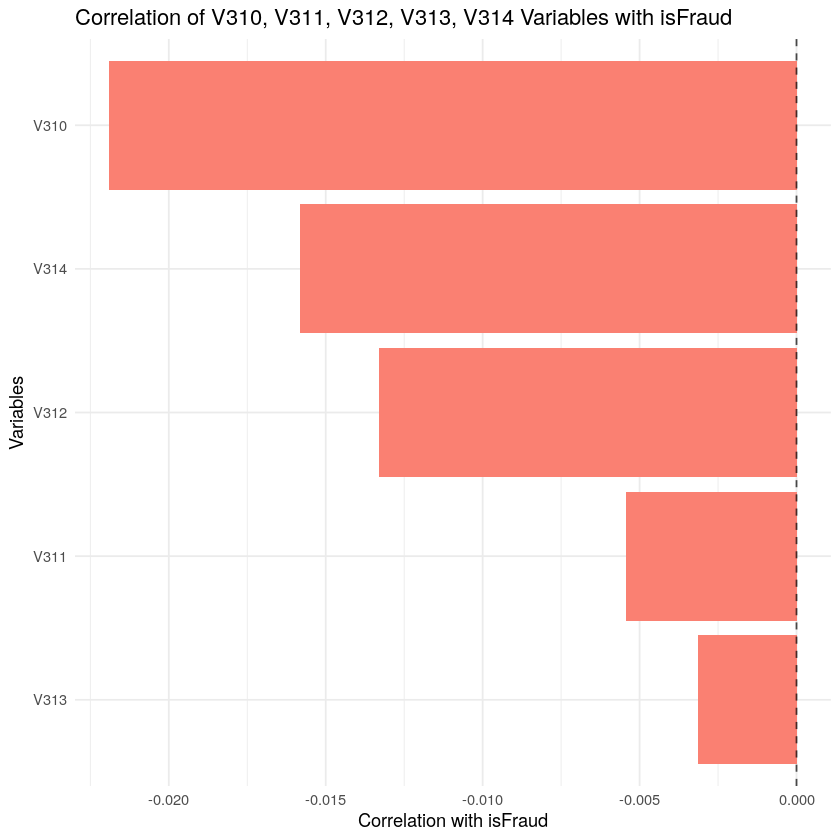

In [ ]:
# view the correlation matrix between column from V310 to V314 vs isFraud ------------------------------------------------
V_column_names <- paste0("V", 310:314)


numeric_V_columns <- data %>% 
  select(all_of(V_column_names)) %>%
  select_if(is.numeric) %>%
  names()

  correlations_with_fraud <- data %>%
    select(all_of(numeric_V_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  fraud_correlations_V <- correlations_with_fraud[numeric_V_columns, "isFraud"]

  cat("\nCorrelations between V310, V311, V312, V313, V314 and isFraud:\n")
  print(round(fraud_correlations_V, 4))

  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations_V),
    Correlation = as.numeric(fraud_correlations_V)
  )
 
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "lightblue", "salmon")) +
    coord_flip() +
    labs(title = "Correlation of V310, V311, V312, V313, V314 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)

# A tibble: 2 × 5
  id_12    FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>         <int>         <int>           <dbl>              <dbl>
1 Found          1269         13176            8.79               91.2
2 NotFound      10049         75506           11.7                88.3


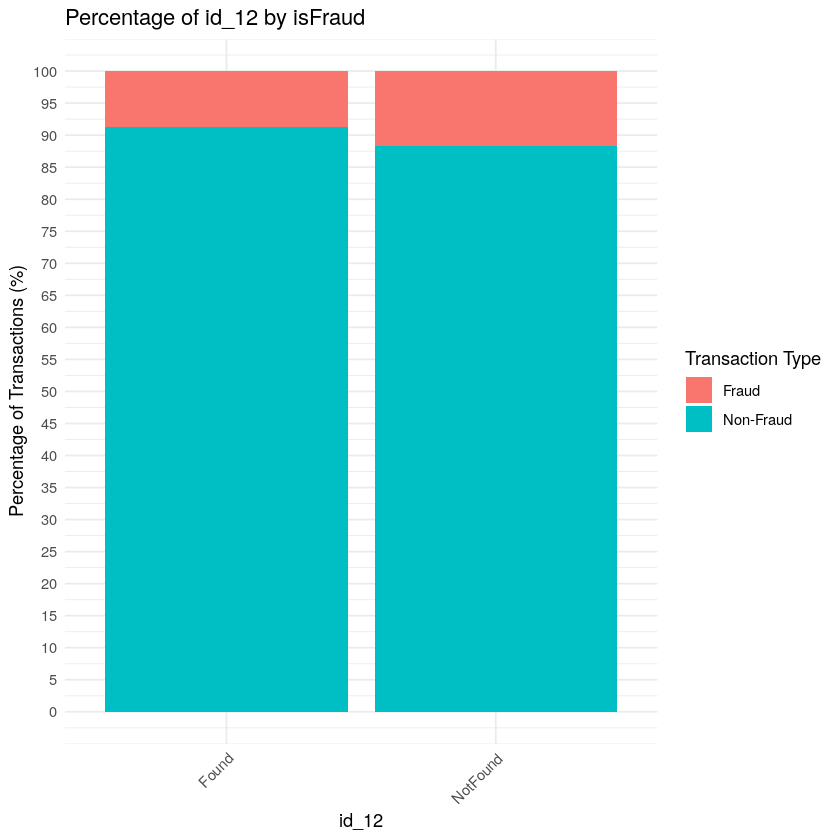

In [ ]:
# view the percentage of id_12 group by isFraud ------------------------------------------------
id_12_fraud_percentage <- data %>%
  group_by(id_12) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_12_fraud_percentage)
# visualize the percentage of id_12 group by isFraud ------------------------------------------------
id_12_plot_data <- id_12_fraud_percentage %>%
  select(id_12, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
ggplot(id_12_plot_data, aes(x = id_12, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_12 by isFraud",
       x = "id_12",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 4 × 5
  id_15       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value         96          2100            4.37               95.6
2 Found             7118         40249           15.0                85.0
3 New               3034         39253            7.17               92.8
4 Unknown           1070          7080           13.1                86.9


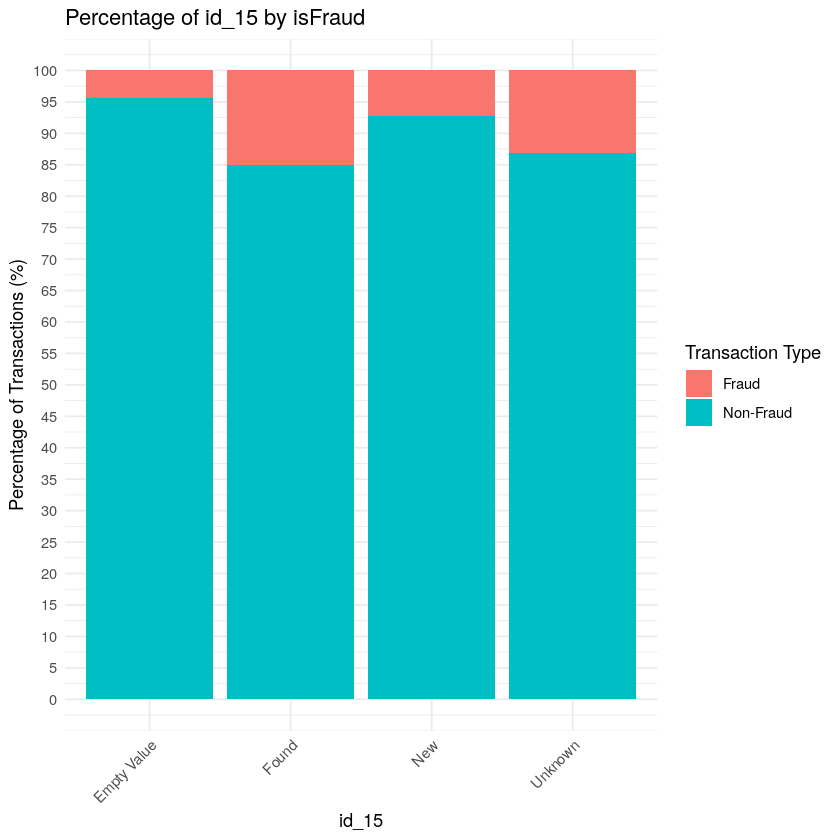

In [ ]:
# view the percentage of id_15 group by isFraud ------------------------------------------------
id_15_fraud_percentage <- data %>%
  group_by(id_15) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_15_fraud_percentage)
# visualize the percentage of id_15 group by isFraud ------------------------------------------------
id_15_plot_data <- id_15_fraud_percentage %>% 
  select(id_15, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
ggplot(id_15_plot_data, aes(x = id_15, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_15 by isFraud",
       x = "id_15",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_16       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value       1166          9180           11.3                88.7
2 Found             7112         39322           15.3                84.7
3 NotFound          3040         40180            7.03               93.0


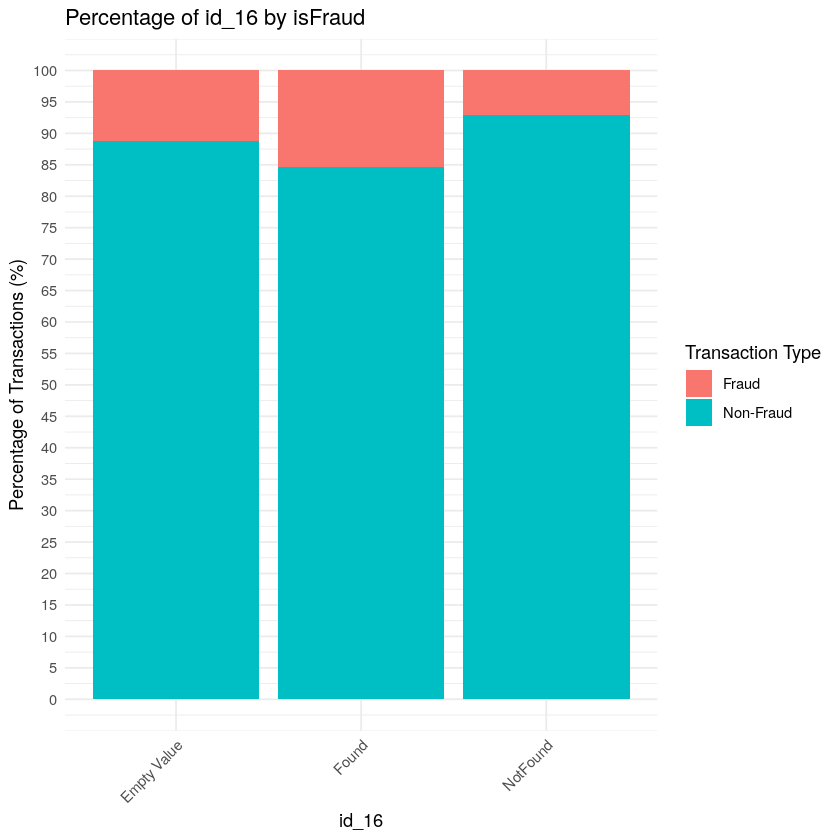

In [ ]:
# view the percentage of id_16 group by isFraud
id_16_fraud_percentage <- data %>%
  group_by(id_16) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_16_fraud_percentage)

# visualize the percentage of id_16 group by isFraud
id_16_plot_data <- id_16_fraud_percentage %>%
  select(id_16, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
ggplot(id_16_plot_data, aes(x = id_16, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_16 by isFraud",
       x = "id_16",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_28       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value        100          2103            4.54               95.5
2 Found             7833         45429           14.7                85.3
3 New               3385         41150            7.60               92.4


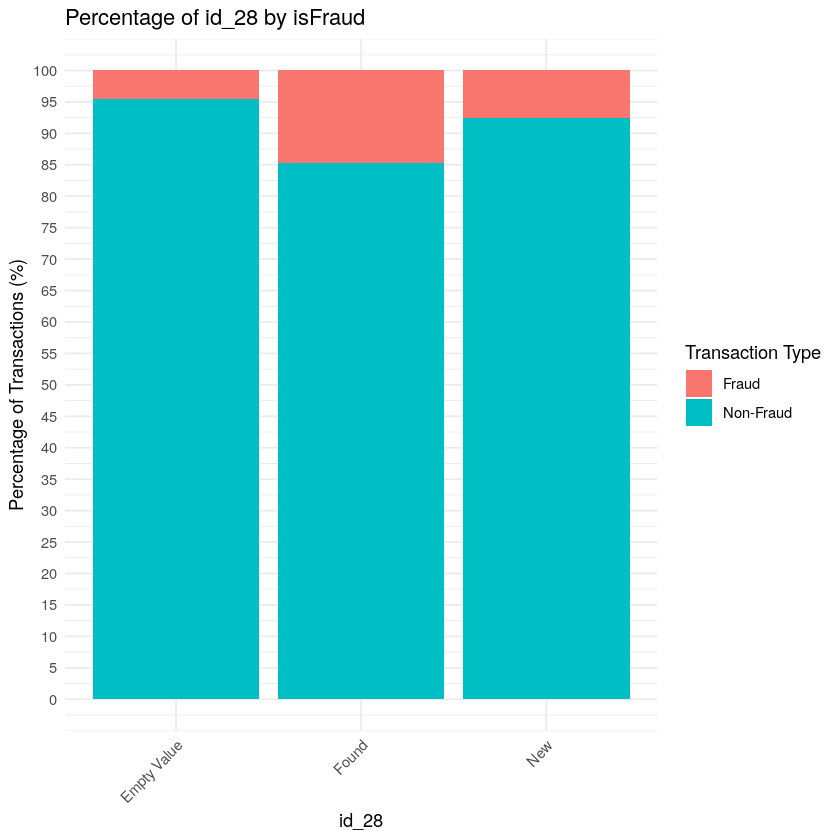

In [ ]:
# view the percentage of id_28 group by isFraud ------------------------------------------------
id_28_fraud_percentage <- data %>%
  group_by(id_28) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_28_fraud_percentage)
# visualize the percentage of id_28 group by isFraud ------------------------------------------------
id_28_plot_data <- id_28_fraud_percentage %>%
  select(id_28, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(id_28_plot_data, aes(x = id_28, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_28 by isFraud",
       x = "id_28",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_29       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value        100          2103            4.54               95.5
2 Found             7827         44567           14.9                85.1
3 NotFound          3391         42012            7.47               92.5


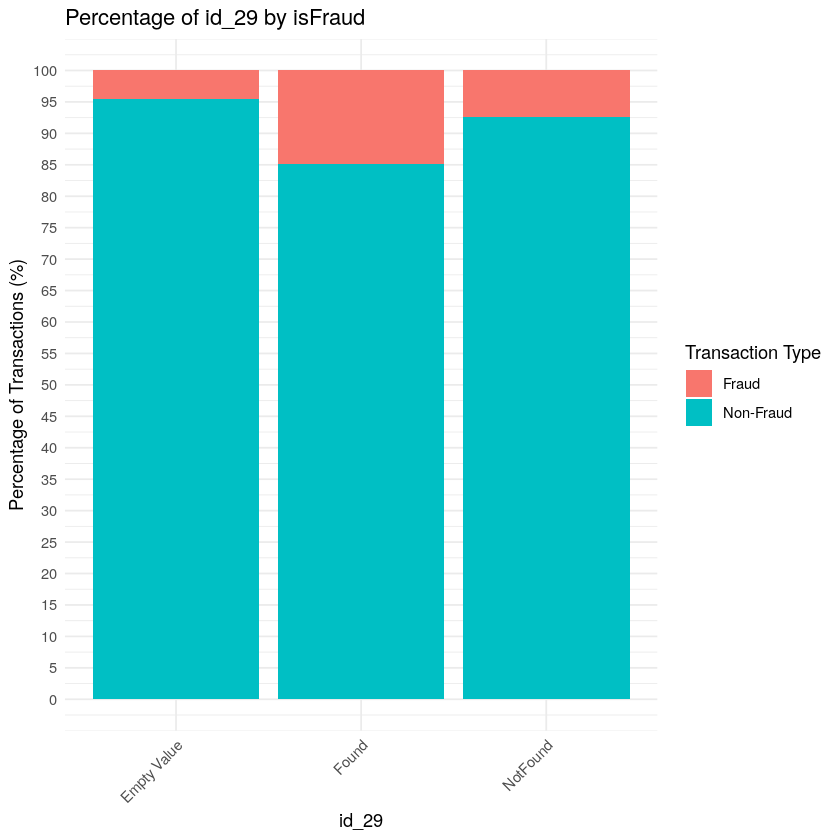

In [ ]:
# view the percentage of id_29 group by isFraud ------------------------------------------------
id_29_fraud_percentage <- data %>%
  group_by(id_29) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_29_fraud_percentage)
# visualize the percentage of id_29 group by isFraud ------------------------------------------------
id_29_plot_data <- id_29_fraud_percentage %>%
  select(id_29, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
ggplot(id_29_plot_data, aes(x = id_29, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_29 by isFraud",
       x = "id_29",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 8 × 5
  id_30       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Android            542          3828           12.4                87.6
2 Empty Value       7876         39318           16.7                83.3
3 Linux               85           675           11.2                88.8
4 Mac                298          8816            3.27               96.7
5 Windows           1268         23775            5.06               94.9
6 func                 0             8            0                 100  
7 iOS               1240         12260            9.19               90.8
8 other                9             2           81.8                18.2


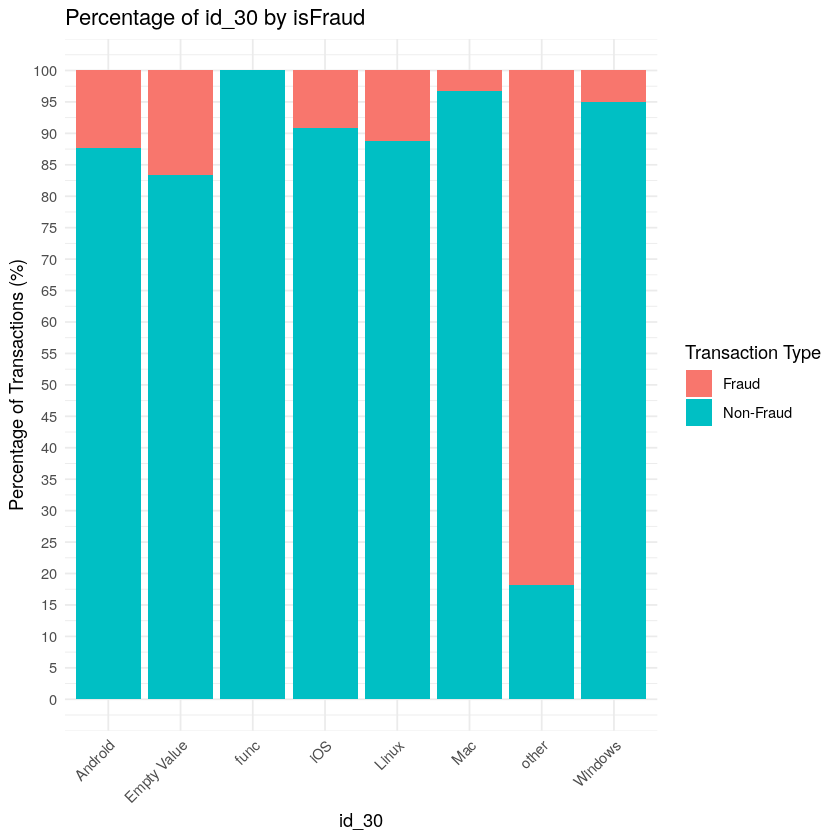

In [ ]:
# view the percentage of id_30 group by isFraud ------------------------------------------------
id_30_fraud_percentage <- data %>%
  group_by(id_30) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_30_fraud_percentage)
# visualize the percentage of id_30 group by isFraud ------------------------------------------------

id_30_plot_data <- id_30_fraud_percentage %>%
  select(id_30, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
ggplot(id_30_plot_data, aes(x = id_30, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_30 by isFraud",
       x = "id_30",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 5 × 5
  id_32 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>      <int>         <int>           <dbl>              <dbl>
1 0              3             1           75                  25  
2 16            18            44           29.0                71.0
3 24          1800         34254            4.99               95.0
4 32          1630         15073            9.76               90.2
5 NA          7867         39310           16.7                83.3


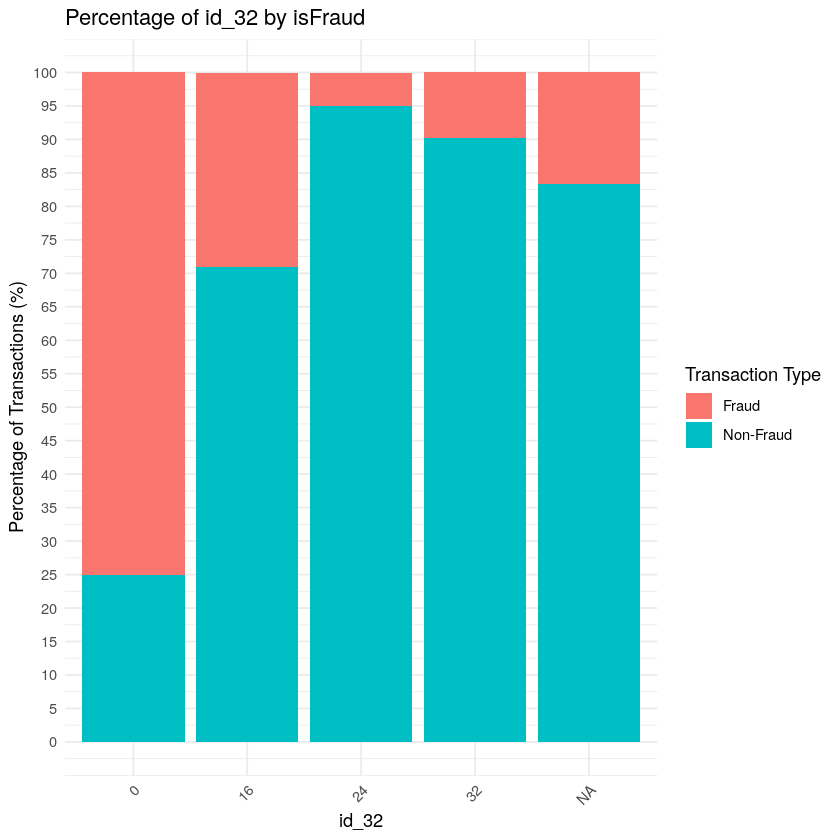

In [ ]:
# Convert id_32 into string and view the percentage of id_32 group by isFraud ------------------------------------------------
data <- data %>% mutate(id_32 = as.character(id_32))
id_32_fraud_percentage <- data %>%
  group_by(id_32) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =  (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_32_fraud_percentage)
# visualize the percentage of id_32 group by isFraud ------------------------------------------------
id_32_plot_data <- id_32_fraud_percentage %>%
  select(id_32, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(id_32_plot_data, aes(x = id_32, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_32 by isFraud",
       x = "id_32",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 5 × 5
  id_34           FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                <int>         <int>           <dbl>              <dbl>
1 Empty Value           7833         39168           16.7                83.3
2 match_status:-1          0             3            0                 100  
3 match_status:0          21           267            7.29               92.7
4 match_status:1        1106         10736            9.34               90.7
5 match_status:2        2358         38508            5.77               94.2


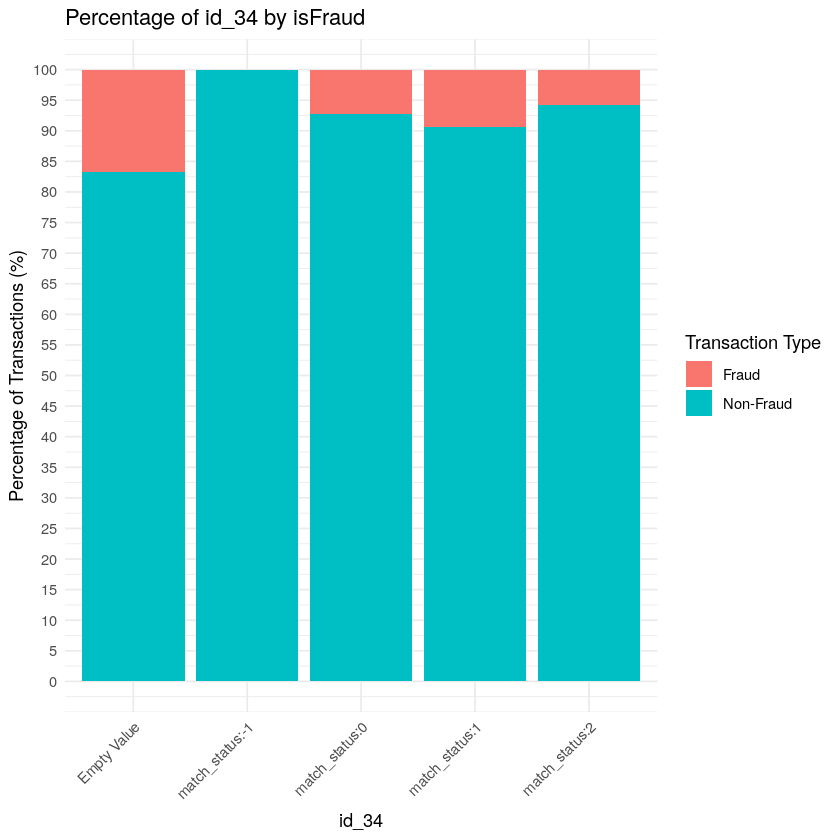

In [ ]:
# view the percentage of id_34 group by isFraud ------------------------------------------------
id_34_fraud_percentage <- data %>%
  group_by(id_34) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_34_fraud_percentage)
# visualize the percentage of id_34 group by isFraud ------------------------------------------------

id_34_plot_data <- id_34_fraud_percentage %>%
  select(id_34, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(id_34_plot_data, aes(x = id_34, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_34 by isFraud",
       x = "id_34",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 3 × 5
  id_35 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE       7745         37069           17.3                82.7
2 TRUE        3477         49513            6.56               93.4
3 NA            96          2100            4.37               95.6


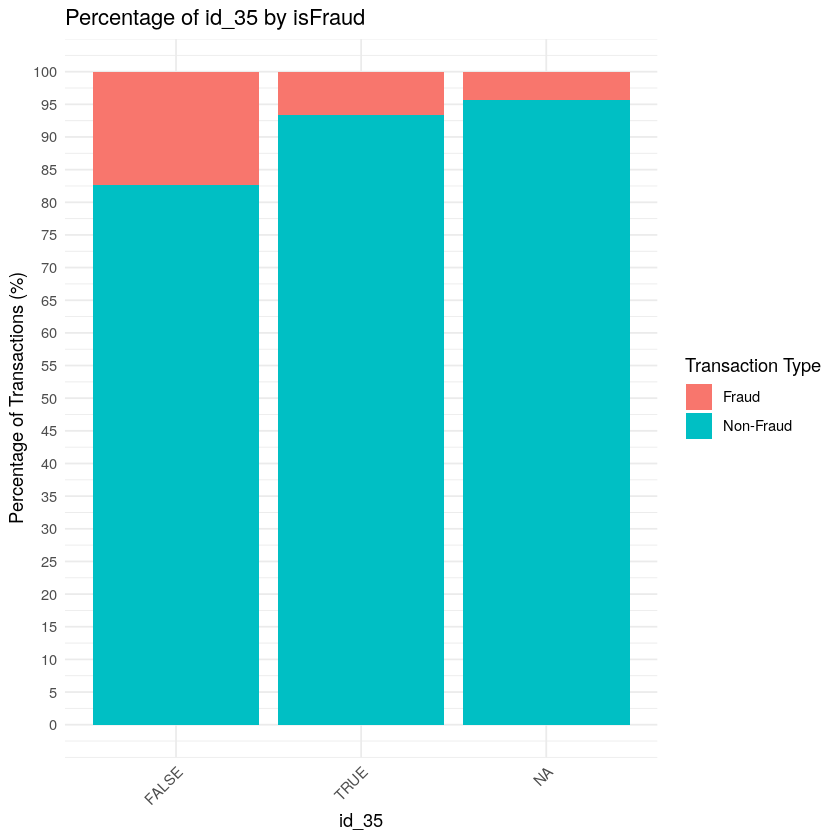

In [ ]:
# view the percentage of id_35 group by isFraud ------------------------------------------------
id_35_fraud_percentage <- data %>%
  group_by(id_35) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_35_fraud_percentage)
# visualize the percentage of id_35 group by isFraud ------------------------------------------------

id_35_plot_data <- id_35_fraud_percentage %>%   
  select(id_35, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(id_35_plot_data, aes(x = id_35, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_35 by isFraud",
       x = "id_35",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 3 × 5
  id_36 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE      10978         82096           11.8                88.2
2 TRUE         244          4486            5.16               94.8
3 NA            96          2100            4.37               95.6


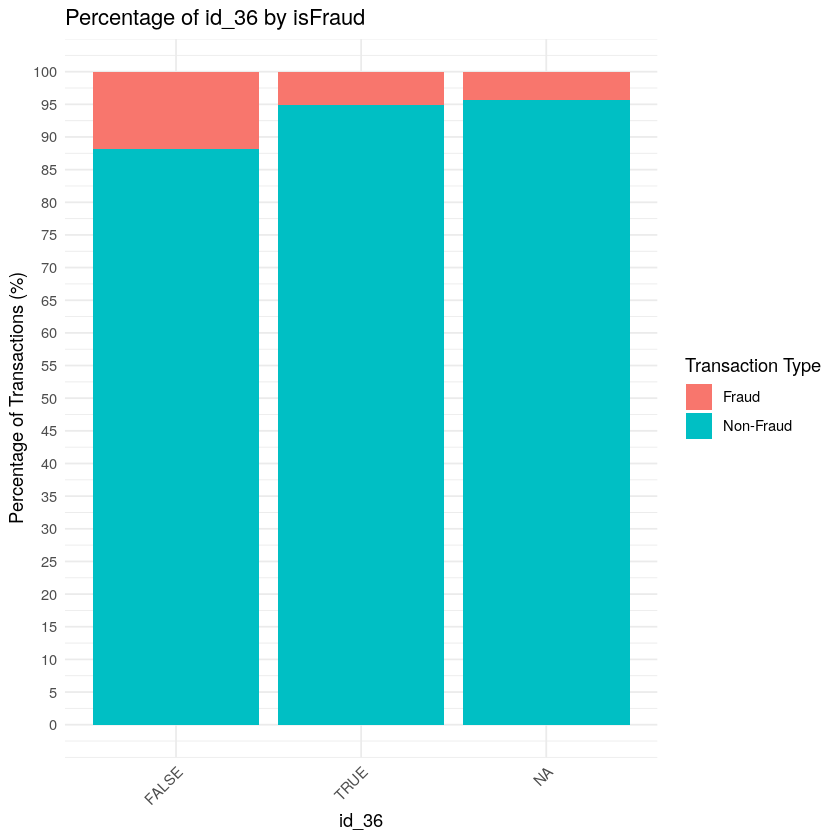

In [ ]:
# view the percentage of id_36 group by isFraud ------------------------------------------------
id_36_fraud_percentage <- data %>%
  group_by(id_36) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_36_fraud_percentage)
# visualize the percentage of id_36 group by isFraud ------------------------------------------------

id_36_plot_data <- id_36_fraud_percentage %>%
  select(id_36, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(id_36_plot_data, aes(x = id_36, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_36 by isFraud",
       x = "id_36",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_37 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE       2020         18944            9.64               90.4
2 TRUE        9202         67638           12.0                88.0
3 NA            96          2100            4.37               95.6


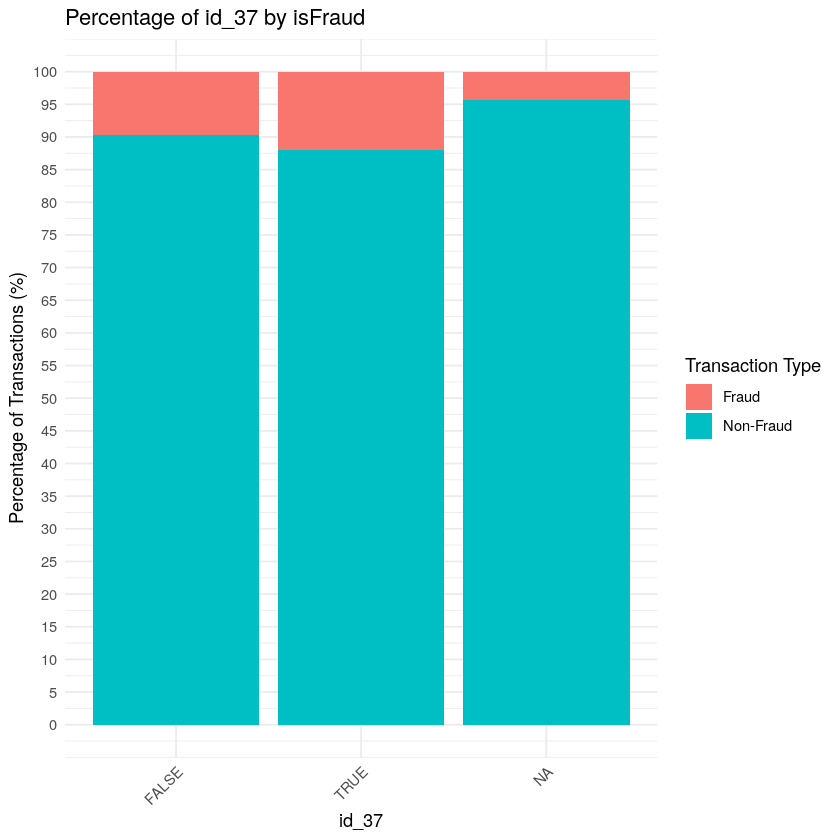

In [ ]:
# view the percentage of id_37 group by isFraud ------------------------------------------------
id_37_fraud_percentage <- data %>%
  group_by(id_37) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_37_fraud_percentage)
# visualize the percentage of id_37 group by isFraud ------------------------------------------------

id_37_plot_data <- id_37_fraud_percentage %>%
  select(id_37, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(id_37_plot_data, aes(x = id_37, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_37 by isFraud",
       x = "id_37",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_38 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE       7229         44511           14.0                86.0
2 TRUE        3993         42071            8.67               91.3
3 NA            96          2100            4.37               95.6


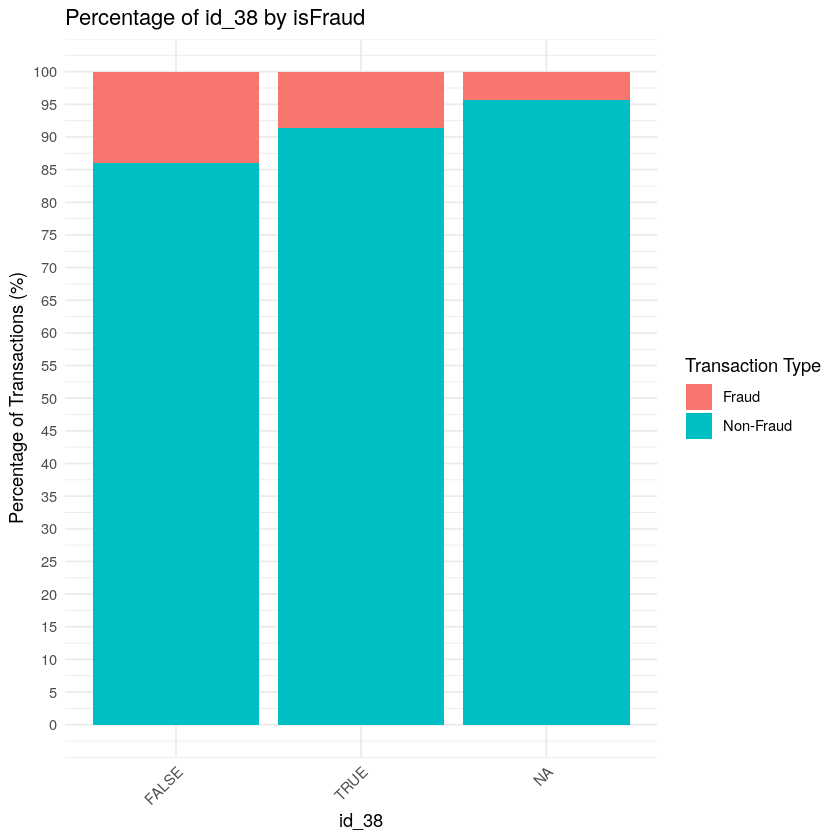

In [ ]:
# view the percentage of id_38 group by isFraud ------------------------------------------------
id_38_fraud_percentage <- data %>%
  group_by(id_38) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_38_fraud_percentage)
# visualize the percentage of id_38 group by isFraud ------------------------------------------------

id_38_plot_data <- id_38_fraud_percentage %>%  
  select(id_38, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))    

ggplot(id_38_plot_data, aes(x = id_38, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_38 by isFraud",
       x = "id_38",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


Correlations between id and isFraud:
  id_01   id_02   id_05   id_06   id_09   id_10   id_11   id_13   id_14   id_17 
-0.1049  0.1365  0.0617 -0.0405  0.0251  0.0176  0.0439 -0.1010  0.0624 -0.0272 
  id_19   id_20 
-0.0319  0.0488 


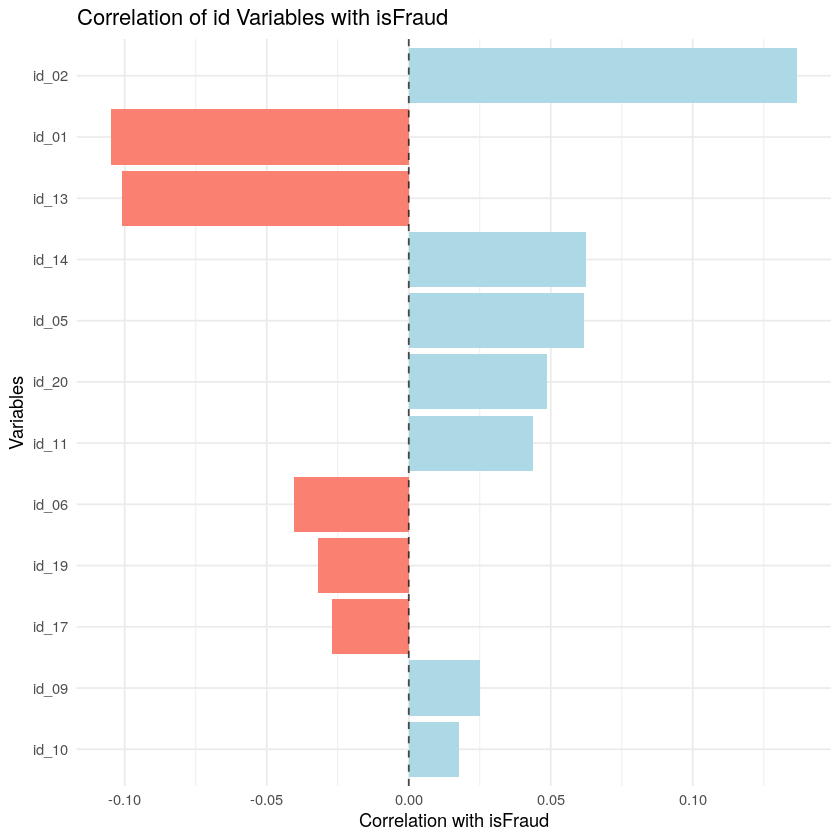

In [ ]:
# view the correlation matrix between column from D1 to D15 vs isFraud ------------------------------------------------
d_column_names <- paste0("id_", c("01", "02",  "05", "06",  "09", "10", 
                                  "11", "12", "13", "14",  "17",  "19", "20",
                                   "30",
                                   "32", "35", "36", "37", "38"))


numeric_id_columns <- data %>% 
  select(all_of(d_column_names)) %>%
  select_if(is.numeric) %>%
  names()


  correlations_with_fraud_id <- data %>%
    select(all_of(numeric_id_columns), isFraud) %>%
    cor(use = "complete.obs")

  fraud_correlations_id <- correlations_with_fraud_id[numeric_id_columns, "isFraud"]

  cat("\nCorrelations between id and isFraud:\n")
  print(round(fraud_correlations_id, 4))

  fraud_corr_df_id <- data.frame(
    Variable = names(fraud_correlations_id),
    Correlation = as.numeric(fraud_correlations_id)
  )
 
  ggplot(fraud_corr_df_id, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df_id$Correlation > 0, "lightblue", "salmon")) +
    coord_flip() +
    labs(title = "Correlation of id Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)

# A tibble: 3 × 5
  DevType     FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value        107          2208            4.62               95.4
2 desktop           5554         53178            9.46               90.5
3 mobile            5657         33296           14.5                85.5


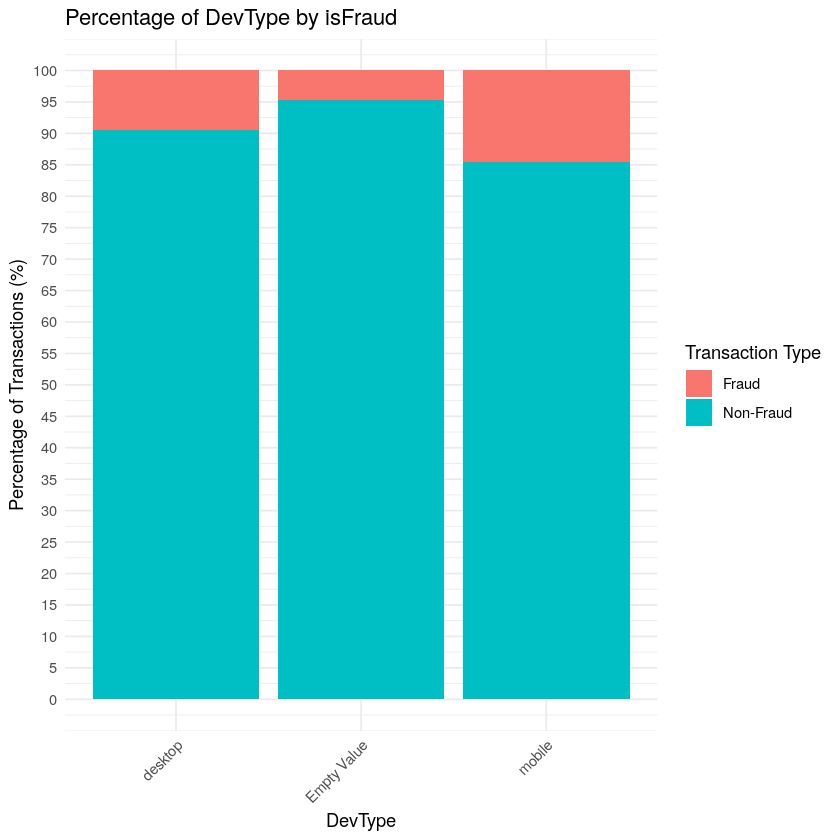

In [ ]:
# view the percentage of DevType group by isFraud
DevType_fraud_percentage <- data %>%
  group_by(DevType) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(DevType_fraud_percentage)


DevType_plot_data <- DevType_fraud_percentage %>%
  select(DevType, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

ggplot(DevType_plot_data, aes(x = DevType, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of DevType by isFraud",
       x = "DevType",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


In [53]:
# only keep the column : 'TxnID', 'isFraud', 'TxnAmt', 'ProductCD', 'addr1', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'P_emaildomain', 'R_emaildomain', 'id_15', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionWeekday', 'Log_TxnAmt', 'fraudulent_card1'

data <- data %>%
  select(TxnID, isFraud, TxnAmt, ProductCD, addr1, card1, card2, card3, card4, card5, card6, 
         P_emaildomain, R_emaildomain, id_15, id_28, id_29, id_32, id_34, id_35, id_36, id_37, id_38,
         TransactionHour, TransactionDay, TransactionMonth, TransactionWeekday,
         Log_TxnAmt, fraudulent_card1)



In [54]:
# add a column to indicate whether addr1 is missing
data <- data %>%
  mutate(addr1_missing = ifelse(is.na(addr1), 0, 1))

In [55]:
# add a column to indicate the factor of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 
data <- data %>%
  mutate(TxnAmt_Factor = case_when(
    TxnAmt < 100 ~ "0-100",
    TxnAmt >= 100 & TxnAmt < 200 ~ "100-200",
    TxnAmt >= 200 & TxnAmt < 300 ~ "200-300",
    TxnAmt >= 300 & TxnAmt < 400 ~ "300-400",
    TxnAmt >= 400 & TxnAmt < 500 ~ "400-500",
    TxnAmt >= 500 & TxnAmt < 600 ~ "500-600",
    TxnAmt >= 600 & TxnAmt < 700 ~ "600-700",
    TxnAmt >= 700 & TxnAmt < 800 ~ "700-800",
    TxnAmt >= 800 & TxnAmt < 900 ~ "800-900",
    TxnAmt >= 900 & TxnAmt < 1000 ~ "900-1000",
    TxnAmt >= 1000 ~ "Above 1000",
    TRUE ~ NA_character_
  ))

# convert TxnAmt_Factor to factor
data$TxnAmt_Factor <- factor(data$TxnAmt_Factor, levels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800", " 800-900", "900-1000", "Above 1000"))


In [56]:
# convert the categorial data into factor
data <- data %>%
  mutate(ProductCD = as.factor(ProductCD),
         card1 = as.factor(card1),
         card2 = as.factor(card2),
         card3 = as.factor(card3),
         card4 = as.factor(card4),
         card5 = as.factor(card5),
         card6 = as.factor(card6),
         P_emaildomain = as.factor(P_emaildomain),
         R_emaildomain = as.factor(R_emaildomain),
         id_15 = as.factor(id_15),
         id_28 = as.factor(id_28),
         id_29 = as.factor(id_29),
         id_32 = as.factor(id_32),
         id_34 = as.factor(id_34),
         id_35 = as.factor(id_35),
         id_36 = as.factor(id_36),
         id_37 = as.factor(id_37),
         id_38 = as.factor(id_38)
  )

# check the structure of the data
str(data)



'data.frame':	100000 obs. of  30 variables:
 $ TxnID             : int  2987004 2987011 2987016 2987022 2987038 2987040 2987048 2987057 2987069 2987070 ...
 $ isFraud           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TxnAmt            : num  82.9 27.3 49.7 82.9 41.4 ...
 $ ProductCD         : Factor w/ 4 levels "AD","LY","TP",..: 3 2 3 3 1 2 2 3 1 3 ...
 $ addr1             : int  402 NA 152 281 312 NA NA 186 312 307 ...
 $ card1             : Factor w/ 7337 levels "1000","1004",..: 1465 1446 351 324 1879 5219 6288 4600 5032 1120 ...
 $ card2             : Factor w/ 472 levels "100","101","102",..: 395 263 431 456 286 443 421 371 195 158 ...
 $ card3             : Factor w/ 95 levels "100","102","105",..: 37 61 37 37 37 9 61 37 37 37 ...
 $ card4             : Factor w/ 5 levels "american express",..: 4 4 5 5 1 5 5 5 5 5 ...
 $ card5             : Factor w/ 99 levels "100","101","102",..: 3 90 92 92 30 92 31 92 92 50 ...
 $ card6             : Factor w/ 4 levels "charge card",..: 2 3 3 2 2 2